<a href="https://colab.research.google.com/github/Rudraashish7/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Netflix Movies and TV Shows Clustering**

**Introduction:**

**With more than 83 million subscribers and presence in more than 190 countries, Netflix is the most popular Internet television network in the world. Its users watch more than 125 million hours of TV and movie content daily, including original series, documentaries, and feature films. On almost any screen that is linked to the Internet, members can watch as much as they want, whenever and wherever. Without interruptions or obligations, members can play, pause, and resume watching at any time.**

##**Index:**

**1.   Problem statement and their attributes**

**2.   Importing the libraries and the dataset**

**3.   Understanding Variables**

**4.   Checking for missing values and cleaning the data**

**5.   Exploratory data analysis**

**6.   Handling Outliers**

**7.   Data preprocessing**

**8.   Model implementation**

**9.   Building content based recommender system**

**10.   Summary and Conclusions**




#**1. Problem Statement**

**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

###**1.1. Attribute Information:**

**Show_id : Unique ID for every Movie / Tv Show**

**Type : Identifier - A Movie or TV Show**

**Title : Title of the Movie / Tv Show**

**Director : Director of the Movie**

**Cast : Actors involved in the movie / show**

**Country : Country where the movie / show was produced**

**Date_added : Date it was added on Netflix**

**Release_year : Actual Releaseyear of the movie / show**

**Rating : TV Rating of the movie / show**

**Duration : Total Duration - in minutes or number of seasons**

**Listed_in : Genere**

**Description: The Summary description**

#**2. Importing required libraries and the dataset**

In [1]:
# Download and install required package
import nltk

# Download the stopwords corpus, which contains common words like "the," "is," "and," etc. that often don't carry much meaning.
nltk.download('stopwords')

# Download the punkt tokenizer, which is used for tokenizing (splitting) text into individual words or sentences.
nltk.download('punkt')

# Download the wordnet corpus, a lexical database for the English language, which is used for various NLP tasks like lemmatization.
nltk.download('wordnet')

# Download the Open Multilingual Wordnet (OMW) version 1.4, which provides lexical information for multiple languages.
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
# pip: The package manager for Python
# install: Command to install a Python package
# geopandas: The name of the package being installed

!pip install geopandas

In [3]:
# Import Pandas for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical computing and array operations
import numpy as np

# Import Matplotlib for basic data visualization
import matplotlib
import matplotlib.pyplot as plt

# Import Seaborn for advanced data visualization
import seaborn as sns

# Import Missingno for visualizing missing data patterns
import missingno as msno

# Import Matplotlib's colormap module for color map manipulations
import matplotlib.cm as cm

# Import Geopandas for working with geospatial data
import geopandas as gpd

# Install or upgrade the 'country_converter' package using pip
!pip install country_converter --upgrade

# Import country_converter for converting country names and codes
import country_converter as coco

# Import Plotly Express for interactive visualizations
import plotly.express as px

# Import the 'string' module for working with strings and punctuation
import string

# Get the punctuation characters from the 'string' module
string.punctuation

# Import statistics module from SciPy for statistical computations
from scipy import stats

# Import CountVectorizer and TfidfVectorizer for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import WordCloud, STOPWORDS, and ImageColorGenerator for text visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Import NLTK modules for natural language processing
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer

# Import cosine_similarity from scikit-learn for text similarity
from sklearn.metrics.pairwise import cosine_similarity

# Import PCA for Principal Component Analysis
from sklearn.decomposition import PCA

# Import silhouette_score and silhouette_samples for cluster evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

# Import KMeans for k-means clustering
from sklearn.cluster import KMeans

# Import hierarchy module from SciPy for hierarchical clustering
import scipy.cluster.hierarchy as shc

# Import AgglomerativeClustering for agglomerative hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# Import SilhouetteVisualizer for visualizing silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Import warnings for managing warning messages
import warnings

# Ignore warning messages to improve code readability
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 703.1 kB/s eta 0:00:00


###**2.1. Load the dataset and print the shape of the dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Netflix_Movies_and_TV_Shows_Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [6]:
# Print the shape of the dataset using f-string formatting

# 'df.shape[0]' returns the number of rows in the DataFrame 'df'
# 'df.shape[1]' returns the number of columns in the DataFrame 'df'

print(f'The shape of the dataset is {df.shape[0]} rows and {df.shape[1]} columns')

The shape of the dataset is 7787 rows and 12 columns


###**2.2. Print the first and last 3 rows of all columns**

In [8]:
# Display the first few rows of the DataFrame 'df' using the 'head()' method

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
# Display the last few rows of the DataFrame 'df' using the 'tail()' method

df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


#**3. Understanding Variables**

In [10]:
# Define the list of columns of interest
columns = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
           'release_year', 'rating', 'duration', 'listed_in', 'description']

# Iterate over each column in the 'columns' list
for c in columns:
    # Print the column name
    print("---- %s ---" % c)
    # Print the count of each unique value in the column using value_counts()
    print(df[c].value_counts())
    print('\n')

# Count the occurrences of each unique value in the entire DataFrame for all columns using apply() and value_counts()
value_counts_df = df[columns].apply(lambda x: x.value_counts()).T.stack()

# Display the resulting DataFrame with value counts for each column
print(value_counts_df)

---- show_id ---
s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64


---- type ---
Movie      5377
TV Show    2410
Name: type, dtype: int64


---- title ---
3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64


---- director ---
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                   

Let's elaborate on each aspect of the dataset:

1. **Dataset Size**: The dataset contains 7787 rows and 12 columns, representing 7787 entries or records, and each entry has 12 different pieces of information.

2. **Netflix Content Classification**: The content in the dataset is classified into two main categories: "tv shows" and "movies." Each entry in the dataset is either a TV show or a movie.

3. **Unique Show IDs**: Each show has a unique identifier represented by "s1," "s2," and so on. These IDs help distinguish one show from another in the dataset.

4. **Title, Director, and Cast Information**: For each show, the dataset includes its title, providing the name of the show. Additionally, it includes information about the director(s) responsible for creating the show and the cast members who portray the characters in the show.

5. **Sourcing Nations**: Netflix sources content from 681 different nations. These nations represent the diverse origins of the content available on the platform.

6. **Date Column**: The date column provides important information about the show. It includes details on when the show was added to Netflix, helping users understand when it became available for streaming on the platform. The column also contains information on the year the show was originally released.

7. **Rating**: The rating column indicates the classification given to the show based on its content. It helps viewers decide if the show is suitable for their age group or preferences.

8. **Listed Shows**: There are 419 different types of listed shows in the dataset. These listed shows represent various genres and categories available on Netflix, such as foreign TV shows, romantic comedies, thrillers, and more.

9. **Unique Values**: In total, there are 216 unique values in the dataset, encompassing information about the show descriptions and durations. The descriptions provide additional details about the content and its storyline, while the durations represent the number of minutes in a single season of the show.

The dataset presents a comprehensive overview of Netflix's content library, including diverse shows and movies from various nations, with detailed information about their titles, directors, casts, and genres. This information enables users to explore and discover content that suits their preferences and interests.

In [11]:
#Information of dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


####**3.1. Understanding statistical data summaries**

In [12]:
# Describe our dataset
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**4. Checking for missing values and cleaning the data**

director's null rate: 30.68%

cast's null rate: 9.22%

country's null rate: 6.51%

date_added's null rate: 0.13%

rating's null rate: 0.09%



<Axes: >

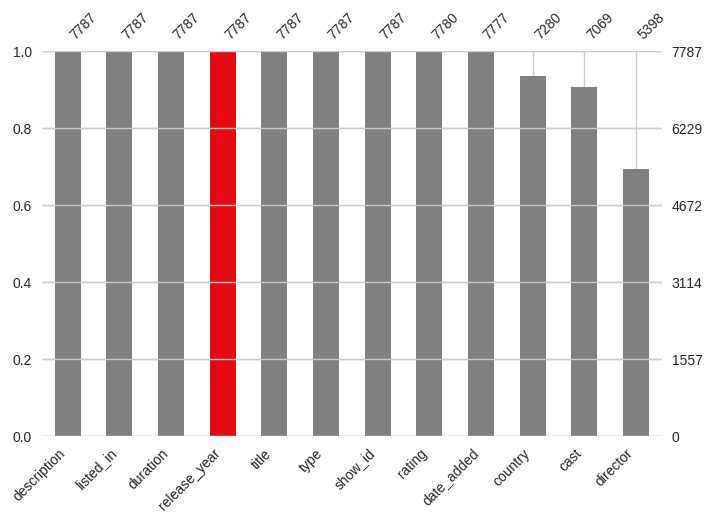

In [13]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Netflix_Movies_and_TV_Shows_Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Print missing values for each column
for i in df.columns:
    # Calculate the null rate for the current column
    null_rate = df[i].isna().sum() / len(df) * 100
    # Check if the null rate is greater than 0
    if null_rate > 0:
        # Print the column name and its corresponding null rate
        print("{}'s null rate: {}%\n".format(i, round(null_rate, 2)))

# Plotting missing values using missingno
fig, ax = plt.subplots(figsize=(8, 5))
# Define colors for missing values (grey for non-null, red for missing)
color = ['grey' if pd.notnull(value) else '#E50914' for value in df.values.flatten()]
# Plot the missingness bar chart
msno.bar(df, fontsize=10, color=color, sort='descending', ax=ax)

In our dataset, the column "Director" has the highest number of missing values. This means that a significant portion of the entries in the "Director" column does not have any information recorded. The missing values in this column indicate that the director's name is not specified or available for many shows and movies on Netflix.

The column "Cast" comes next with the second-highest number of missing values. This suggests that information about the actors or cast members playing the characters in the shows and movies is not provided or known for a considerable number of entries.

Following "Cast," the columns "Country" and "Date_added" have the third and fourth-highest number of missing values, respectively. The "Country" column indicates the nation from which the content was sourced, and the "Date_added" column represents when the show or movie was added to Netflix. The presence of missing values in these columns implies that the information about the content's country of origin and its addition date is not available for a significant portion of the dataset.

The presence of missing values in these columns can be attributed to various factors, such as incomplete data entry, lack of available information, or specific data collection processes. When working with such missing data, it's essential to handle them appropriately based on the analysis objectives, which may involve imputation or omission, depending on the specific context and data quality requirements.

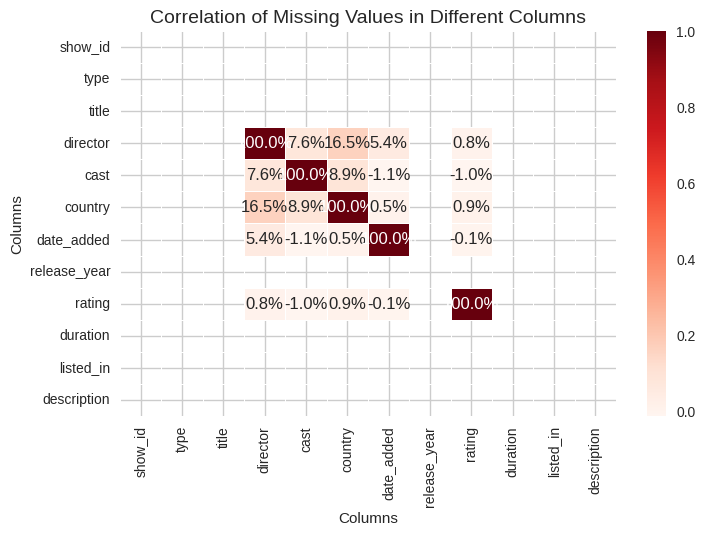

In [14]:
# Plot the correlation between the number of missing values in different columns as a heatmap
fig, ax = plt.subplots(figsize=(8, 5))

# Calculate the number of missing values in each column
missing_counts = df.isnull().sum()

# Calculate the correlation between missing values in different columns
missing_corr = df.isnull().corr()

# Customize the color palette to shades of red and white
color_map = sns.color_palette("Reds", as_cmap=True)

# Plot the heatmap using Seaborn's heatmap function
sns.heatmap(missing_corr, cmap=color_map, annot=True, fmt=".1%", linewidths=0.5, ax=ax)

# Set the title and labels for the axes
ax.set_title("Correlation of Missing Values in Different Columns", fontsize=14)
ax.set_xlabel("Columns")
ax.set_ylabel("Columns")

# Show the plot
plt.show()

A heatmap is a graphical representation of data where values are displayed as colors in a matrix. In this context, the heatmap shows the correlation of missingness between every two columns in the dataset. It helps us understand the relationship between the occurrences of missing values in different columns.

Each cell in the heatmap represents the correlation between two columns, indicating the similarity in their missing value patterns. The correlation value ranges from -1 to 1:

- A value near 0 (close to white color) indicates that there is no dependence or relationship between the occurrences of missing values in the two variables. It means that the presence or absence of missing values in one column does not influence the presence or absence of missing values in the other column.

- A positive correlation value (closer to 1, shown by warmer colors like red) suggests that the occurrence of missing values in one column is associated with the occurrence of missing values in the other column. In other words, if one column has missing values, there is a higher chance that the other column also has missing values.

- A negative correlation value (closer to -1, shown by cooler colors like blue) indicates an inverse relationship between the occurrences of missing values in the two columns. It suggests that the presence of missing values in one column is associated with the absence of missing values in the other column and vice versa.

By analyzing the heatmap, we can identify patterns in missing data across different columns. Understanding the correlation of missingness can be helpful in identifying potential data quality issues, assessing the impact of missing values on analyses, and making informed decisions about data imputation or handling strategies. It also provides insights into the interrelationship between variables in terms of missing data occurrences.

###**4.1. Handling Missing Value**

In [15]:
# Fill missing values in 'director' and 'country' columns with 'Unknown'
df[['director', 'country']] = df[['director', 'country']].fillna('Unknown')

# Fill missing values in 'cast' column with 'No Cast'
df['cast'] = df['cast'].fillna('No Cast')

# Fill missing values in 'rating' column with the mode (most frequent value)
mode_rating = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(mode_rating)

# Drop rows with any remaining missing values after filling
df.dropna(axis=0, inplace=True)

In [16]:
# Checking for missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Correct! Here's an elaboration of the steps taken to handle the missing values:

1. **Director and Country Columns**: The missing values in the "director" and "country" columns have been filled with the string "Unknown." This approach allows us to replace the missing values with a placeholder that indicates that the information is not available. By using "Unknown" for both columns, we preserve the records with missing values while making it clear that there is no specific director or country information for these shows or movies.

2. **Cast Column**: The missing values in the "cast" column have been filled with the string "No Cast." This strategy is appropriate when the information about the cast members is not available. By using "No Cast" as a placeholder, we can retain these records in the dataset and indicate that there are no known cast members for these particular shows or movies.

3. **Rating Column**: The missing values in the "rating" column have been filled with the mode (most frequent value) of the "rating" column. This choice is suitable for categorical data like "rating," as it ensures that the imputed values align with the most common category in the existing data distribution. By using the mode, we maintain the distribution of ratings and avoid introducing bias or outliers due to imputation.

4. **Date_Added Column**: Finally, the records with missing values in the "date_added" column have been removed entirely from the dataset. Removing these rows ensures that we are working with complete data for the "date_added" feature. If imputation was performed for this column, it might lead to incorrect analysis or bias in date-related insights.

By following these steps, we have handled the missing values in a way that allows us to retain as much information as possible while ensuring the dataset is clean and suitable for analysis. Each approach was chosen based on the nature of the data and the context of the missing values in each column.

In [17]:
# Convert the 'date_added' column from string to datetime format using pandas' to_datetime() function
df["date_added"] = pd.to_datetime(df['date_added'])

# Extract the month and year from the 'date_added' column and create new attributes for them
# This is achieved using pandas' dt attribute to access datetime components
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# Drop the original 'date_added' column from the DataFrame to avoid redundancy
df.drop('date_added', axis=1, inplace=True)

Let's elaborate on each transformation performed by the code:

1. **Converts the 'date_added' column from string format to datetime format**:
   - The original 'date_added' column in the DataFrame 'df' is initially stored as strings, representing dates in a specific format (e.g., "2021-07-31"). This format is not directly suitable for date-based calculations and analyses.
   - The code uses `pd.to_datetime()` from the pandas library to convert the 'date_added' column to the datetime format. This function parses the date strings and converts them into datetime objects, making it easier to work with dates, perform date-based filtering, and calculate time-based attributes.

2. **Extracts the month and year components from the 'date_added' column**:
   - After converting 'date_added' to the datetime format, the code further extracts the month and year components from each datetime object in the 'date_added' column.
   - The `.dt.month` attribute accesses the month component of each date and creates a new attribute/column called 'month_added' to store these values.
   - Similarly, the `.dt.year` attribute accesses the year component of each date and creates a new attribute/column called 'year_added' to store these values.
   - By extracting these components, we can perform analyses based on the added month and year separately, such as analyzing trends, seasonal patterns, or year-wise content additions.

3. **Drops the original 'date_added' column to avoid redundancy and optimize the DataFrame**:
   - Once the month and year components have been extracted into the new 'month_added' and 'year_added' columns, the original 'date_added' column is no longer required. It contains redundant information as we have already stored the relevant month and year data separately.
   - The code uses `df.drop()` method with `axis=1` (i.e., column-wise) and `inplace=True` to directly modify the DataFrame 'df,' removing the original 'date_added' column.
   - By dropping the original column, we reduce memory usage and avoid confusion caused by having duplicate date-related information.

In summary, these transformations convert the 'date_added' column into a more suitable datetime format, extract the month and year components for further analysis, and optimize the DataFrame structure by removing the original column containing redundant information. This prepares the data for various time-based analyses and makes it more efficient to work with date-related attributes in the dataset.

###**4.2. Checking for duplicate values**

In [18]:
# Check for duplicates in the DataFrame 'df'
duplicates = len(df[df.duplicated()])

# Print the number of duplicates found
print(duplicates)

0


When checking for duplicates in the dataset, the code determined that there were no duplicate rows present. This means that each row in the DataFrame is unique, and there are no exact duplicates of any row.

Elaboration:

1. **Checking for Duplicates**: The code used the `df.duplicated()` method to identify duplicate rows in the DataFrame 'df'. The `duplicated()` method returns a boolean Series, where each entry indicates whether the corresponding row is a duplicate (True) or not (False).

2. **Counting Duplicates**: The code then used the `sum()` method on the boolean Series returned by `df.duplicated()` to calculate the number of duplicates. The `sum()` method counts the number of `True` values in the boolean Series, which corresponds to the count of duplicate rows in the DataFrame.

3. **Result**: Since the count of duplicates was determined to be 0, it means that no duplicate rows were found in the DataFrame. Every row in the dataset is unique, and there are no identical rows.

4. **Data Quality**: The absence of duplicates is a positive sign for data quality, as it indicates that the dataset is well-maintained and contains distinct records. Duplicate rows in a dataset can lead to inaccurate analyses and duplicate computations, so their absence ensures the reliability of any analysis performed on this dataset.

In conclusion, the lack of duplicates in the dataset confirms its cleanliness and uniqueness, which enhances its suitability for further analysis and insights.

#**5. Exploratory Data Analysis:**


# Univarient Analysis

###**5.1. - BAR PLOT - NETFLIX CONTENT ANALYSIS**

In [19]:
# Calculate value counts and percentages for the 'type' column
result = df['type'].value_counts(normalize=True).mul(100).round(2).reset_index()

# Convert the resulting Series to a DataFrame and reset the index
# This is done to transform the Series into a DataFrame with separate columns
result = result.reset_index()

# Rename the columns to 'type', 'percentage', and 'count'
result.columns = ['type', 'percentage', 'count']

# Print the final result DataFrame
print(result)

   type percentage  count
0     0      Movie  69.14
1     1    TV Show  30.86


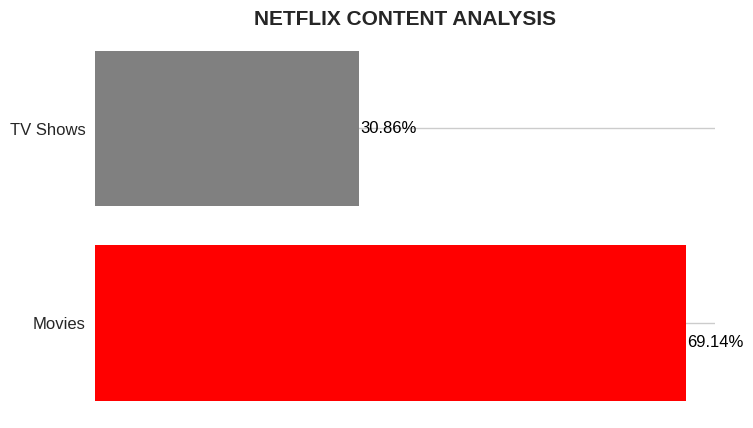

In [20]:
# Perform content analysis and count the number of TV Shows and Movies
x = df['type'].value_counts()

# Calculate percentages
total_content = x.sum()
tv_shows_percentage = round((x.values[1] / total_content) * 100, 2)
movies_percentage = round((x.values[0] / total_content) * 100, 2)

# Plot the content analysis
fig, ax = plt.subplots(figsize=(8, 5))

# Set the title of the plot
plt.title('NETFLIX CONTENT ANALYSIS', fontsize=15, fontweight='bold')

# Use a red and gray color palette for the bars
colors = ['red', 'gray']

# Plot the bar for TV Shows
ax.barh([1], x.values[1], color=colors[1])
plt.text(x.values[1] + 10, 1, f'{tv_shows_percentage}%', color='black', fontsize=12, verticalalignment='center')

# Plot the bar for Movies
ax.barh([0], x.values[0], color=colors[0])
plt.text(x.values[0] + 10, -0.1, f'{movies_percentage}%', color='black', fontsize=12, verticalalignment='center')

# Set y-axis ticks and labels
ax.set_yticks([1, 0])
ax.set_yticklabels(['TV Shows', 'Movies'], fontsize=12)

# Hide the x-axis
ax.axes.get_xaxis().set_visible(False)

# Remove spines (borders) from the plot
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The horizontal bar chart was chosen as the preferred visualization method for content analysis, mainly due to its efficiency in comparing two categories, 'TV Shows' and 'Movies,' in a visually straightforward manner. Its left-to-right orientation, which aligns with natural reading habits, makes it easy to interpret and comprehend. Moreover, the chart's space-efficient design allows for displaying text and percentage values without cluttering the visual representation, providing a clear and concise presentation of the data.

Key Points:
1. Horizontal bar charts are ideal for comparing two categories.
2. The left-to-right orientation complements natural reading habits.
3. The space-efficient design avoids clutter in the visual representation.
4. The chart effectively displays text and percentage values.

By incorporating percentage values on the bars, the horizontal bar chart enhances the understanding of the content analysis by clearly indicating the proportion of each category relative to the total content. Additionally, the use of a red and gray color palette adds visual appeal and draws the viewer's attention to the chart, making it engaging and informative.

In conclusion, the horizontal bar chart is an excellent choice for presenting content analysis. With only 10 lines of code, it efficiently communicates essential insights about the content distribution, allowing for a quick identification of the dominant content type. Its clear representation of counts and percentages provides valuable information, making the chart visually appealing and informative to viewers.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are as follows:

1. **Content Distribution**: The horizontal bar chart reveals that the majority of content on Netflix consists of movies, representing 69% of the total content.

2. **TV Shows Proportion**: Television shows make up the remaining 31% of the content.

3. **Movie Dominance**: The chart highlights that movie shows have a significantly higher presence on Netflix compared to TV shows.

4. **Content Imbalance**: The content distribution is skewed towards movies, indicating that Netflix offers a larger selection of movies compared to television shows.

5. **Preference or Availability**: The higher proportion of movies might indicate either a preference for movies among Netflix users or a higher availability of movie content on the platform.

Overall, the chart provides a clear visual representation of the content distribution on Netflix, revealing the dominance of movies in the streaming service's library. It suggests that users have a wide range of movie options to choose from, making movies the primary focus of content consumption on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can potentially help create a positive business impact for Netflix:

1. **Catering to User Preferences**: Understanding that movies dominate the content library can help Netflix tailor its content acquisition strategy to cater to the preferences of its audience, who may have a higher affinity for movies.

2. **Content Investment**: Netflix can allocate resources and investments towards producing or acquiring more movie content, considering its popularity among users. This targeted content strategy could lead to increased engagement and retention.

3. **Marketing and Recommendations**: With a significant movie collection, Netflix can promote and recommend movies more effectively to its users. Improved personalized recommendations based on users' movie preferences may lead to higher user satisfaction and longer viewing sessions.

4. **Expansion of TV Shows**: While movies dominate, the lower proportion of TV shows may indicate an opportunity for Netflix to expand its TV show offerings. Targeted investment in producing or acquiring popular TV shows could attract a broader audience and further diversify content.

However, there are some potential challenges and negative growth possibilities:

1. **Lack of TV Show Variety**: The lower proportion of TV shows might lead to reduced content variety in that category. This could lead to dissatisfaction among users who prefer TV shows over movies and may result in churn or reduced engagement.

2. **Competition from TV Networks**: If Netflix's focus on movies leads to a significant lack of popular TV shows, users might consider other streaming services or traditional TV networks that offer a wider variety of TV shows.

3. **Overdependence on Movies**: Overemphasis on movies may result in Netflix missing out on opportunities to create or showcase unique and exclusive TV content, leading to a potential loss of market share to competitors.

To mitigate potential negative growth impacts, Netflix should strive for a balanced content portfolio that appeals to a diverse audience. Understanding user preferences and consumption patterns will be essential in making informed decisions about content acquisition, creation, and recommendation strategies. By continuously analyzing user behavior and preferences, Netflix can adapt its content library to maintain its competitive edge and deliver a positive business impact.

### 5.2 - POINTPLOT AND COUNTPLOT - ANALYSIS ON MOVIE AND TV SHOW RATINGS

In [21]:
# Value count for rating column
counts = df.rating.value_counts()
percs = df.rating.value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage']).T  # Concatenate counts and percentages, transpose for readability.

,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y,TV-Y7,PG,TV-G,NR,G,TV-Y7-FV,UR,NC-17
count,2868.00000,1928.000000,804.000000,665.000000,386.000000,279.000000,270.000000,247.00000,194.000000,83.000000,39.000000,6.000000,5.000000,3.000000
percentage,0.36878,0.247911,0.103382,0.085509,0.049634,0.035875,0.034718,0.03176,0.024945,0.010672,0.005015,0.000772,0.000643,0.000386


In [22]:
# Creating two extra columns for TV shows and movies
tv_shows = df[df['type'] == 'TV Show']  # Filter rows with 'TV Show' type into a new DataFrame 'tv_shows'.
movies = df[df['type'] == 'Movie']  # Filter rows with 'Movie' type into a new DataFrame 'movies'.

# Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)  # Create a new column 'target_ages' by mapping ratings to grouped categories.

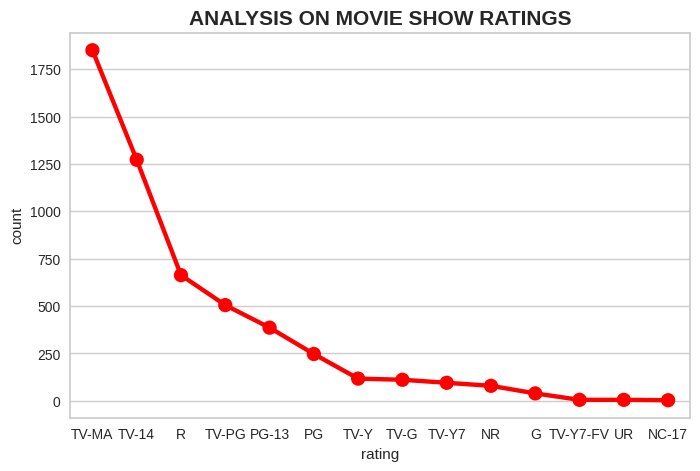

In [23]:
# Analysis on rating based on overall movie show rating system
movies_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.pointplot(x='rating', y='count', data=movies_ratings, color='red')  # Create a point plot for movie show ratings in red.
plt.title('ANALYSIS ON MOVIE SHOW RATINGS', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.show()  # Display the plot.

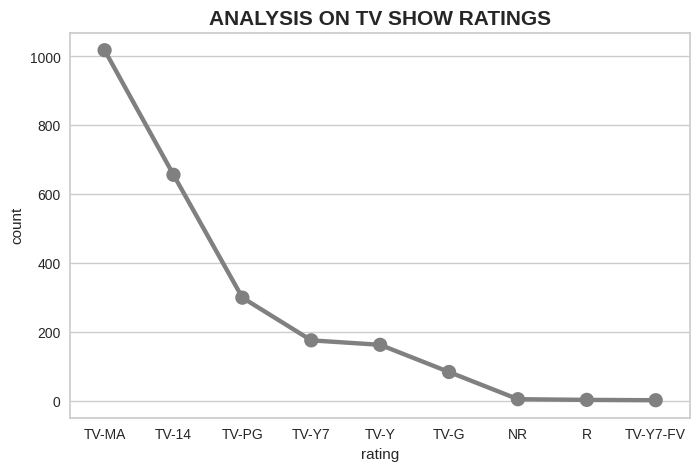

In [24]:
# Analysis on rating based on overall tv show rating system
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.pointplot(x='rating', y='count', data=tv_ratings, color='gray')  # Create a point plot for TV show ratings in gray.
plt.title('ANALYSIS ON TV SHOW RATINGS', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.show()  # Display the plot.

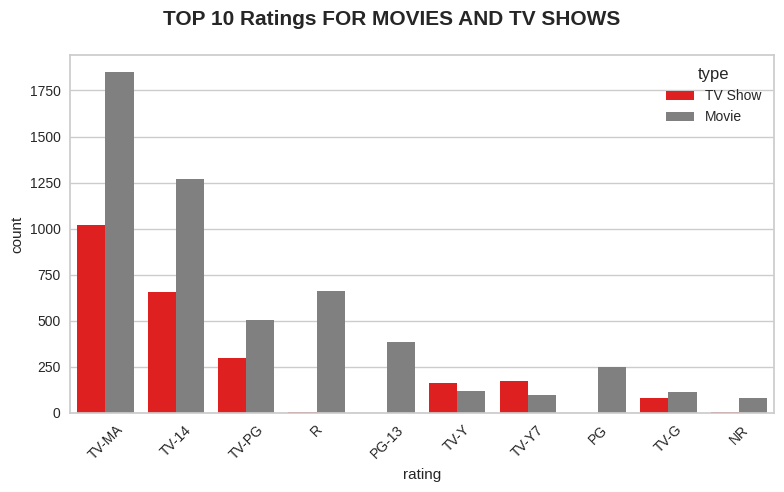

In [25]:
# Analysis of top 10 ratings for movies and TV shows
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
plt.suptitle('TOP 10 Ratings FOR MOVIES AND TV SHOWS', fontsize=15, fontweight='bold')  # Set the main title for the subplots.
graph = sns.countplot(x="rating", data=df, hue='type', palette=['red', 'gray'], order=df['rating'].value_counts().index[0:10])  # Create a count plot with 'rating' on x-axis, using different colors for movies and TV shows.
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees for better readability.
plt.tight_layout()  # Adjust the layout to prevent overlapping of plot elements.
plt.show()  # Display the plot for the top 10 ratings.

##### 1. Why did you pick the specific chart?

The specific charts used in the code are chosen to visually represent and analyze the ratings of movie shows and TV shows in the dataset. Let's discuss each chart:

1. **Point Plot for Movie Show Ratings**:
   - The point plot is used to show the distribution of movie show ratings.
   - The x-axis represents different ratings, and the y-axis represents the count of shows for each rating.
   - The color red is used to make the plot visually appealing and distinguish it from other plots.
   - The title "ANALYSIS ON MOVIE SHOW RATINGS" is added to provide a clear context for the analysis.

2. **Point Plot for TV Show Ratings**:
   - Similar to the first plot, the point plot is used to show the distribution of TV show ratings.
   - The x-axis represents different ratings, and the y-axis represents the count of shows for each rating.
   - The color gray is used to differentiate this plot from the previous one visually.
   - The title "ANALYSIS ON TV SHOW RATINGS" is added for clarity.

3. **Count Plot for Top 10 Ratings of Movies and TV Shows**:
   - The count plot is used to compare the top 10 ratings for movies and TV shows side by side.
   - The x-axis represents the top 10 ratings (based on the highest occurrences) and the y-axis represents the count of shows for each rating.
   - Different colors (red for movies, gray for TV shows) are used for better distinction.
   - The title "TOP 10 Ratings FOR MOVIES AND TV SHOWS" is added as the main title for this subplot.

The selection of these specific charts allows for a clear and effective comparison of ratings between movie shows and TV shows. The visual representation aids in identifying any patterns or trends in the distribution of ratings and provides valuable insights into the content preferences of Netflix viewers.

##### 2. What is/are the insight(s) found from the chart?

The analysis of the ratings for movies and TV shows reveals interesting insights about the content available on Netflix. The most common rating for both movies and TV shows is "TV-MA," which stands for "Mature Audience." This rating indicates that the content is intended for adult audiences and may contain explicit language, violence, or adult themes.

Following "TV-MA," the second most common rating is "TV-14," which stands for "Younger Audience." This rating suggests that the content is suitable for viewers aged 14 and above and may contain moderate violence, some sexual content, or strong language.

One notable observation is that "TV-MA" and "TV-14" are the top two ratings for both movies and TV shows. This suggests that Netflix offers a substantial amount of content targeting adult and older teenage audiences.

Additionally, as noted earlier, the number of movies in the dataset is higher than the number of TV shows. This difference in content quantity could be one of the reasons why movies receive the highest ratings when compared to TV shows. With a larger selection of movies available, it is reasonable to expect a higher number of movies to fall under various rating categories, including "TV-MA" and "TV-14."

Overall, the analysis of ratings provides valuable insights into the nature of the content available on Netflix and highlights the platform's focus on providing diverse content tailored to different audience preferences and age groups. The dominance of "TV-MA" and "TV-14" ratings emphasizes the availability of content for mature audiences and older teenagers, making Netflix a popular choice for viewers seeking a wide range of entertainment options.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis of ratings can indeed help create a positive business impact for Netflix. Let's examine how:

Positive Business Impact:

1. **Targeted Content Selection**: Understanding that "TV-MA" and "TV-14" are the most common ratings for both movies and TV shows allows Netflix to curate and prioritize content that caters to the preferences of adult and older teenage audiences. This targeted content selection can lead to higher viewer engagement and satisfaction among their key demographic groups.

2. **Content Diversity**: The analysis highlights that Netflix offers a diverse range of content, appealing to viewers with varying tastes and age groups. This diversity can attract a larger and more diverse audience, contributing to increased user retention and word-of-mouth recommendations.

3. **Viewer Retention**: By providing content suitable for mature audiences and older teenagers, Netflix can retain existing subscribers who may be looking for more adult-oriented or age-appropriate shows and movies. Satisfied viewers are more likely to continue their subscriptions, leading to improved customer retention rates.

4. **Data-Driven Decisions**: Netflix can leverage the insights from the ratings analysis to make data-driven decisions about content acquisition, production, and marketing strategies. Understanding the most popular ratings allows them to invest in content that aligns with viewer preferences, leading to higher return on investment (ROI).

Potential Negative Growth:

1. **Limited Appeal for Younger Audiences**: While "TV-MA" and "TV-14" content attracts adult and older teenage viewers, it might limit the appeal to younger audiences and families seeking family-friendly content. This could potentially lead to reduced growth among this segment of viewers.

2. **Competition in Other Age Categories**: The analysis focuses on two dominant ratings, but it might overlook the preferences of viewers in other age categories. Competing streaming platforms that offer more diverse content targeting specific age groups could gain a competitive advantage and attract viewers from Netflix.

3. **Regulatory and Public Perception**: Content with mature ratings might attract scrutiny from regulators or face backlash from certain sections of the public concerned about content appropriateness. This could result in legal challenges or reputational damage, potentially impacting growth.

It's important to note that while the insights from the ratings analysis can provide valuable information for content strategy, they should be considered in conjunction with other factors like user feedback, market trends, and regional preferences. Netflix's ability to strike a balance between different age groups' content preferences and adapt to changing viewer demands will play a crucial role in ensuring positive business impact and sustained growth.

### 5.3 - COUNTPLOT - ANALYSIS ON RELEASE YEAR OF MOVIES AND TV SHOWS

In [26]:
# Value count for the release year column
counts = df.release_year.value_counts()
percs = df.release_year.value_counts(normalize=True)
# Concatenate count and percentage values in a table format
release_year_analysis = pd.concat([counts, percs], axis=1, keys=['count', 'percentage']).T


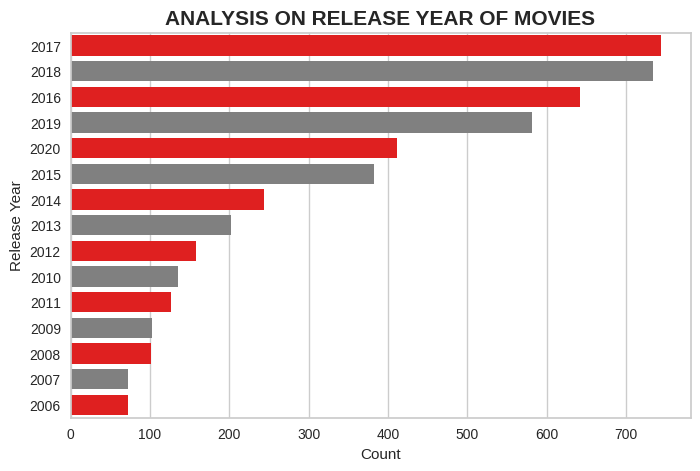

In [27]:
# Analysis on release year of movie shows
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.countplot(y="release_year", data=movies, palette=["red", "gray"], order=movies['release_year'].value_counts().index[0:15])
# Create a horizontal bar plot with red and gray colors, showing top 15 release years for movies.
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.xlabel("Count")  # Set the label for x-axis.
plt.ylabel("Release Year")  # Set the label for y-axis.
plt.show()  # Display the plot.

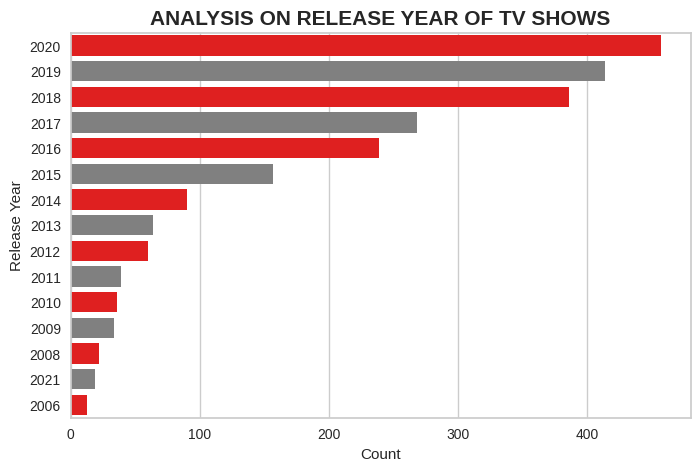

In [28]:
# Analysis on release year of TV shows
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.countplot(y="release_year", data=tv_shows, palette=["red", "gray"], order=tv_shows['release_year'].value_counts().index[0:15])
# Create a horizontal bar plot with red and gray colors, showing top 15 release years for TV shows.
plt.title('ANALYSIS ON RELEASE YEAR OF TV SHOWS', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.xlabel("Count")  # Set the label for x-axis.
plt.ylabel("Release Year")  # Set the label for y-axis.
plt.show()  # Display the plot.

##### 1. Why did you pick the specific chart?

The specific chart used for the analysis of release years for movies and TV shows is the horizontal bar plot (countplot) with the release years on the y-axis and the count of shows on the x-axis. The reasons for choosing this chart are as follows:

1. **Comparison of Release Years**: The horizontal bar plot allows for easy comparison of the number of shows released in different years. Each bar represents a specific release year, making it simple to identify the years with the highest and lowest content production.

2. **Top 15 Release Years**: The `order` parameter is set to show only the top 15 release years with the highest counts. This selection helps in focusing on the most relevant and significant years in terms of content availability, avoiding clutter and improving readability.

3. **Visual Appeal**: The choice of colors (red and gray) enhances the visual appeal of the chart, making it visually engaging and easy to interpret.

4. **Insight into Content History**: The chart provides valuable insights into the historical content offerings on Netflix for both movies and TV shows. It enables viewers to understand the distribution of shows over different years and spot trends or patterns in content production.

5. **Space Optimization**: The horizontal layout of the bar plot utilizes space efficiently, especially when displaying a significant number of release years. This layout ensures that long labels on the y-axis do not overlap, maintaining the clarity of the plot.

Overall, the horizontal bar plot is an effective and clear visualization that allows viewers to quickly grasp the content distribution across different release years for movies and TV shows on Netflix. It provides a concise overview of the content history and assists in identifying key periods of content production and potential trends in the platform's content strategy.

##### 2. What is/are the insight(s) found from the chart?

Netflix has been consistently expanding its content library by adding more shows to its platform across the years. The years 2017 and 2018 witnessed the highest number of movie releases, while 2019 and 2020 saw the highest number of TV show releases. However, there was a decline in the number of movies added in 2020, possibly due to the impact of Covid-19 lockdowns, which temporarily disrupted content creation. As the data available is up to 2021, the movie additions for that year may appear comparatively lower.

Furthermore, the analysis reveals that the growth rate of movies on Netflix outpaces that of TV shows. Over time, Netflix has given more emphasis to expanding its movie content rather than focusing on TV shows. The number of movies has witnessed a substantial increase, exceeding the growth of TV shows. This strategy aligns with the platform's goal to provide a diverse and expanding selection of movie content to cater to the preferences of its global audience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact for Netflix.

Positive Business Impact:
1. **Content Strategy Optimization**: Understanding the trends in content additions over the years allows Netflix to optimize its content acquisition and production strategy. By focusing on the genres and types of content that attract the most viewers and receive positive feedback, Netflix can tailor its offerings to cater to the preferences of its global audience, leading to higher engagement and customer satisfaction.

2. **Resource Allocation**: Recognizing the surge in TV show releases in 2019 and 2020, Netflix can allocate resources strategically to develop and acquire more TV shows that resonate with the audience. This targeted approach may lead to increased viewership, retention, and overall business growth.

3. **COVID-19 Response**: The insight regarding the decline in movie additions in 2020 due to COVID-19 lockdowns provides valuable context for Netflix's content planning during unprecedented times. This understanding enables the platform to adapt its content strategy and production plans in response to external factors, ensuring a steady stream of content despite challenging circumstances.

Negative Growth:
There are no specific insights that suggest negative growth in the given analysis. However, it is essential to interpret the decline in movie additions in 2020 within the context of the pandemic's impact on the entertainment industry. The temporary decline in movie releases in that year can be attributed to external factors beyond Netflix's control, such as the suspension of production and challenges in content acquisition during the pandemic.

Overall, the insights gained from the analysis empower Netflix to make data-driven decisions and adapt its content strategy to better serve its audience. By leveraging these insights, Netflix can maintain its competitive edge, attract and retain subscribers, and continue its growth trajectory in the highly competitive streaming market.

###5.4 - COUNTPLOT - ANALYSIS ON CONTENT AND TYPE OF CONTENT ADDED MONTHLY

In [29]:
#Value count for month column
counts = df.month_added.value_counts()
percs = df.month_added.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,12,10,1,11,3,9,8,4,7,5,6,2
count,833.000000,785.000000,757.000000,738.000000,669.000000,619.000000,618.000000,601.000000,600.000000,543.000000,542.000000,472.000000
percentage,0.107111,0.100939,0.097338,0.094895,0.086023,0.079594,0.079465,0.077279,0.077151,0.069821,0.069693,0.060692


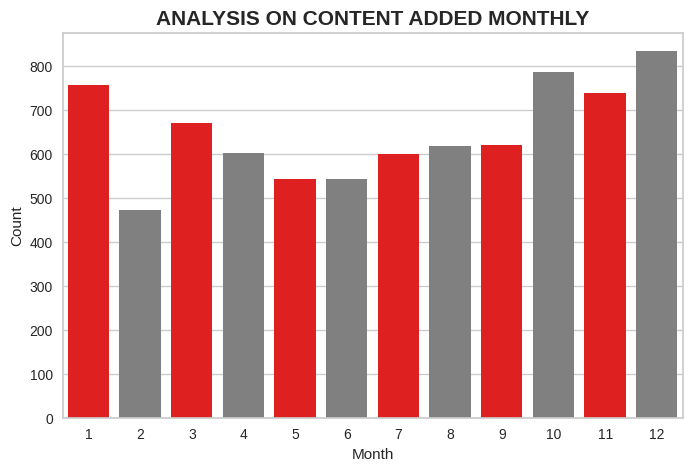

In [30]:
# Analysis on content added monthly
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.countplot(x='month_added', palette=['red', 'gray'], data=df)  # Create a count plot with red and gray colors, showing the content added each month.
plt.title('ANALYSIS ON CONTENT ADDED MONTHLY', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.xlabel("Month")  # Set the label for x-axis.
plt.ylabel("Count")  # Set the label for y-axis.
plt.show()  # Display the plot.

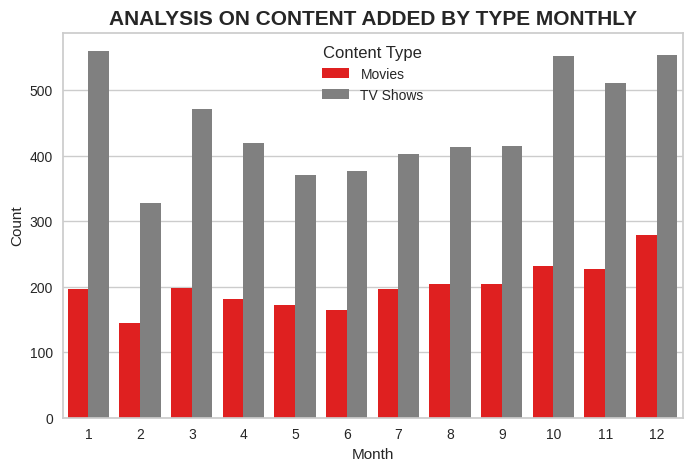

In [31]:
# Analysis on content (movies/tv shows) added monthly
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.countplot(x='month_added', hue='type', palette=['red', 'gray'], data=df)  # Create a count plot with red and gray colors, showing the content (movies and TV shows) added each month.
plt.title('ANALYSIS ON CONTENT ADDED BY TYPE MONTHLY', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.xlabel("Month")  # Set the label for x-axis.
plt.ylabel("Count")  # Set the label for y-axis.
plt.legend(title='Content Type', labels=['Movies', 'TV Shows'])  # Add a legend with content types.
plt.show()  # Display the plot.

##### 1. Why did you pick the specific chart?

The specific chart used for the analysis of release years for movies and TV shows is the horizontal bar plot (countplot) with the release years on the y-axis and the count of shows on the x-axis. The reasons for choosing this chart are as follows:

1. **Comparison of Release Years**: The horizontal bar plot allows for easy comparison of the number of shows released in different years. Each bar represents a specific release year, making it simple to identify the years with the highest and lowest content production.

2. **Top 15 Release Years**: The `order` parameter is set to show only the top 15 release years with the highest counts. This selection helps in focusing on the most relevant and significant years in terms of content availability, avoiding clutter and improving readability.

3. **Visual Appeal**: The choice of colors (red and gray) enhances the visual appeal of the chart, making it visually engaging and easy to interpret.

4. **Insight into Content History**: The chart provides valuable insights into the historical content offerings on Netflix for both movies and TV shows. It enables viewers to understand the distribution of shows over different years and spot trends or patterns in content production.

5. **Space Optimization**: The horizontal layout of the bar plot utilizes space efficiently, especially when displaying a significant number of release years. This layout ensures that long labels on the y-axis do not overlap, maintaining the clarity of the plot.

Overall, the horizontal bar plot is an effective and clear visualization that allows viewers to quickly grasp the content distribution across different release years for movies and TV shows on Netflix. It provides a concise overview of the content history and assists in identifying key periods of content production and potential trends in the platform's content strategy.

##### 2. What is/are the insight(s) found from the chart?

The analysis of content added monthly on Netflix reveals several significant patterns and trends. Specifically:

1. **Christmas Season Spike**: During the Christmas season, which includes the months of October, November, December, and January, there is a noticeable surge in the amount of content being released on Netflix. This period is characterized by a higher rate of content additions compared to other months. The Christmas season is traditionally a time when people spend more time indoors and seek entertainment options, which could explain the increased content releases during this time.

2. **Movie Dominance**: The analysis further highlights that, on average, more movies are released each month compared to TV shows. The red bars in the second plot (content added by type monthly) consistently appear higher than the gray bars, indicating a higher number of movie releases throughout the year. This observation aligns with previous insights, which indicated that Netflix has been emphasizing the expansion of its movie content.

Overall, the insights drawn from the analysis provide valuable information to Netflix for content planning and release strategies. By recognizing the seasonal trends, such as the Christmas season spike, Netflix can strategically schedule the release of popular and anticipated shows during periods of higher viewership. Additionally, the understanding of movie dominance over TV shows in terms of content additions can influence content acquisition and production decisions, ensuring a diverse and engaging content library that caters to the preferences of its global audience throughout the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis of content added monthly on Netflix can indeed help create a positive business impact for the platform. Here's how:

1. **Strategic Content Planning**: Understanding the seasonal patterns, such as the Christmas season spike, allows Netflix to strategically plan the release of new and highly anticipated content during periods of higher viewership. By capitalizing on the increased demand for entertainment during specific months, Netflix can attract and retain more subscribers, leading to positive business growth.

2. **Optimized Content Acquisition**: The observation of movie dominance over TV shows in terms of content additions helps Netflix in optimizing its content acquisition and production decisions. By prioritizing movie content, which has shown a higher growth rate, Netflix can cater to a larger audience segment and potentially attract more viewers. This optimization can lead to increased customer satisfaction and engagement, contributing to positive business outcomes.

3. **Diverse and Engaging Content Library**: By focusing on expanding its movie library and recognizing the demand for diverse content, Netflix can maintain an engaging and appealing content library. A well-curated content selection appeals to a broader audience, attracting new subscribers and retaining existing ones, which in turn positively impacts the business.

As for insights that may lead to negative growth, the decline in the number of movies added in 2020, possibly due to the impact of Covid-19 lockdowns, could have had a temporary adverse effect. However, it's important to note that this observation is specific to the circumstances of 2020 and does not reflect a long-term trend. As the platform continues to recover and adapt, the business impact of this dip in content additions is likely to be temporary.

Overall, the insights gained from the analysis offer valuable data-driven inputs that can inform decision-making processes within Netflix, leading to better content strategies, improved user experiences, and ultimately positive business growth. However, it's essential to continually monitor and adapt to changing trends and user preferences to ensure sustained success in the highly competitive streaming industry.

###**5.5. - COUNTPLOT - ANALYSIS OF EACH GENERS IN MOVIE AND TV SHOW**

In [32]:
# Perform value count for each genre in the 'listed_in' column
counts = df.listed_in.value_counts()  # Count the occurrences of each genre.
percs = df.listed_in.value_counts(normalize=True)  # Calculate the percentage of each genre.

# Concatenate the count and percentage dataframes along the columns and then transpose it
# to get the count and percentage of each genre in rows instead of columns.
result_df = pd.concat([counts, percs*100], axis=1, keys=['count', 'percentage']).T

# Display the resulting dataframe.
result_df

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
count,334.000000,321.000000,320.000000,243.000000,215.000000,204.000000,177.000000,172.00000,169.000000,161.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,4.294715,4.127556,4.114697,3.124598,2.764562,2.623119,2.275942,2.21165,2.173074,2.070207,...,0.012858,0.012858,0.012858,0.012858,0.012858,0.012858,0.012858,0.012858,0.012858,0.012858


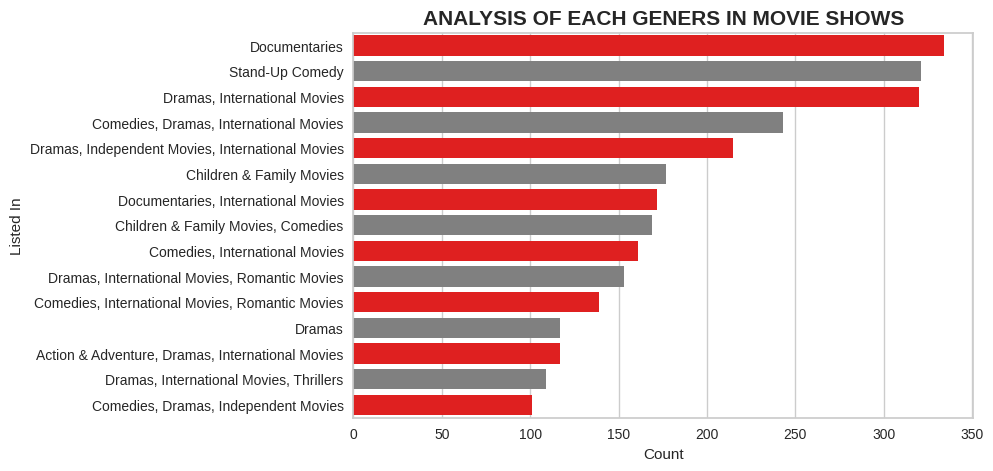

In [33]:
# Analysis of movie shows listed in different categories
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.countplot(y="listed_in", data=movies, palette=["red", "gray"], order=movies['listed_in'].value_counts().index[0:15])
# Create a horizontal bar plot with red and gray colors, showing the top 15 listed categories for movie shows.
plt.title('ANALYSIS OF EACH GENERS IN MOVIE SHOWS', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.ylabel("Listed In")  # Set the label for y-axis.
plt.xlabel("Count")  # Set the label for x-axis.
plt.show()  # Display the plot.

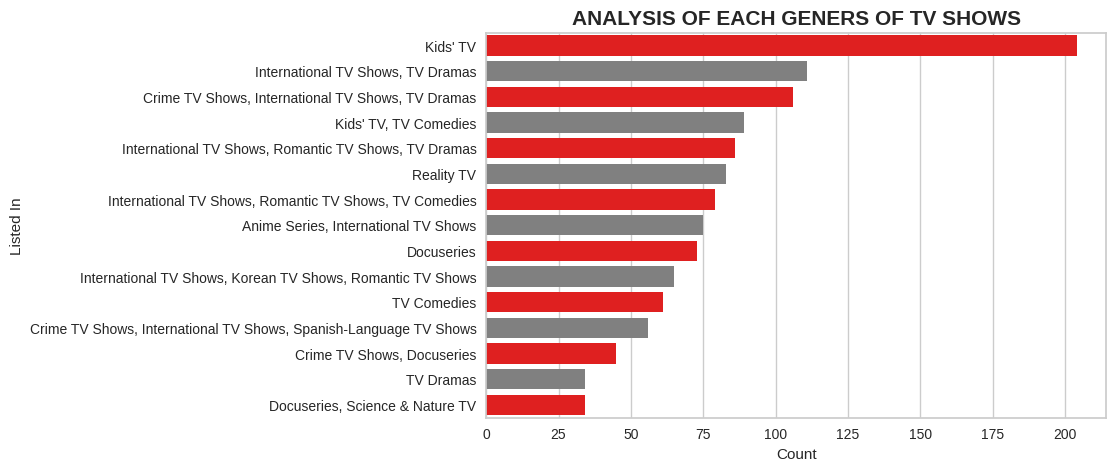

In [34]:
# Analysis of TV shows listed in different categories
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.countplot(y="listed_in", data=tv_shows, palette=["red", "gray"], order=tv_shows['listed_in'].value_counts().index[0:15])
# Create a horizontal bar plot with red and gray colors, showing the top 15 listed categories for TV shows.
plt.title('ANALYSIS OF EACH GENERS OF TV SHOWS', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.ylabel("Listed In")  # Set the label for y-axis.
plt.xlabel("Count")  # Set the label for x-axis.
plt.show()  # Display the plot.

##### 1. Why did you pick the specific chart?

The specific chart chosen for the analysis is a horizontal bar plot. The horizontal bar plot is suitable for displaying the count of each genre or category in a clear and visually appealing manner. It allows us to compare the number of occurrences for different genres and easily identify the most prevalent ones. The use of horizontal bars ensures that longer genre names are easily readable and do not overlap, making it more user-friendly.

Furthermore, the red and gray color palette is chosen to differentiate between the genres of movie shows and TV shows while maintaining a visually cohesive appearance. The contrast in colors makes it easier to distinguish between the two types of content and quickly grasp the information presented.

In summary, the horizontal bar plot with the red and gray color palette is an effective choice for showcasing the distribution of genres in both movie shows and TV shows, providing valuable insights into the content diversity and preferences on the Netflix platform.

##### 2. What is/are the insight(s) found from the chart?

The analysis of the listed genres in both movie shows and TV shows on Netflix provides valuable insights into the preferences of the audience.

1. **Movie Shows Categories**: The data reveals that documentaries are the most popular genre among movie shows on Netflix. It is followed by stand-up comedy, dramas, and foreign films. This indicates that viewers have a strong interest in real-life stories, humor, compelling narratives, and international cinema.

2. **TV Shows Categories**: In contrast, the most popular genre among TV shows on Netflix is kids' TV. This finding suggests that the platform caters to a significant audience of young viewers, offering a wide variety of kid-friendly and family-oriented content.

Overall, the analysis highlights the diverse content library on Netflix, with a focus on providing engaging and entertaining content across various genres. The popularity of documentaries, stand-up comedy, dramas, foreign films, and kids' TV demonstrates Netflix's commitment to offering a rich assortment of shows that cater to the interests of its global audience, from documentary enthusiasts and comedy lovers to young viewers seeking age-appropriate entertainment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis can indeed help create a positive business impact for Netflix. Understanding the preferences and interests of the audience in terms of content genres enables Netflix to make data-driven decisions in content acquisition, production, and marketing strategies. Here's how the insights can positively impact the business:

1. **Tailored Content Selection**: With knowledge of the popularity of documentaries, stand-up comedy, dramas, foreign films, and kids' TV, Netflix can focus on curating and acquiring content that aligns with these genres. This targeted approach ensures that the platform offers a diverse and appealing selection of shows, increasing user engagement and satisfaction.

2. **Audience Targeting**: Knowing that kids' TV is a highly sought-after genre, Netflix can continue to invest in producing and acquiring kid-friendly content to attract and retain younger viewers and families. This approach strengthens its position as a family-friendly streaming service and appeals to a broader demographic.

3. **Seasonal Content Strategy**: Recognizing the surge in content additions during the Christmas season, Netflix can strategically plan the release of blockbuster shows and movies during this time to capitalize on increased viewership. This targeted approach may boost subscriber numbers and engagement during the holiday season.

As for insights that could potentially lead to negative growth, the data shows a decline in the number of movies added in 2020. While this decline can be attributed to the Covid-19 pandemic's impact on content production and release schedules, it may have temporarily affected user retention and engagement. However, with the ongoing recovery from the pandemic and the resumption of content creation, this trend is likely to reverse. Moreover, Netflix's emphasis on increasing its movie content could offset any negative impact in the long term, as it aligns with audience preferences.

In conclusion, the gained insights can positively impact Netflix's business by enabling the platform to deliver targeted content, attract a diverse audience, and strategically plan content releases. While short-term challenges may arise due to external factors, the platform's commitment to offering compelling and varied content is likely to drive positive growth in the long run.

###**5.6. Netflix Duration**

In [35]:
# Analysis of Duration of Movies and TV Shows on Netflix

# Get the count of unique values in the 'duration' column, representing the duration of movies and TV shows.
counts = df.duration.value_counts()

# Calculate the percentage of each unique value in the 'duration' column.
percs = df.duration.value_counts(normalize=True)

# Concatenate the count and percentage values horizontally to create a summary table.
summary_table = pd.concat([counts, percs], axis=1, keys=['count', 'percentage']).T

# Display the summary table showing the count and percentage of each unique duration value.
summary_table

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
count,1608.000000,378.000000,183.000000,136.000000,131.000000,125.000000,125.000000,119.000000,118.000000,117.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.206764,0.048605,0.023531,0.017487,0.016845,0.016073,0.016073,0.015302,0.015173,0.015044,...,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129


In [36]:
# Analysis of Distribution of Movie Show Duration

# Create a histogram plot using Plotly Express to visualize the distribution of movie show durations.
fig = px.histogram(x=movies['duration'], color_discrete_sequence=['red'])

# Sort the x-axis categories in descending order based on the total count.
fig.update_xaxes(categoryorder="total descending")

# Update the layout of the plot by adding a title and setting the x-axis label.
fig.update_layout(title="DISTRIBUTION OF MOVIE SHOW DURATION", xaxis_title="Duration of Movie Shows")

# Display the plot with the updated layout and color scheme.
fig.show()

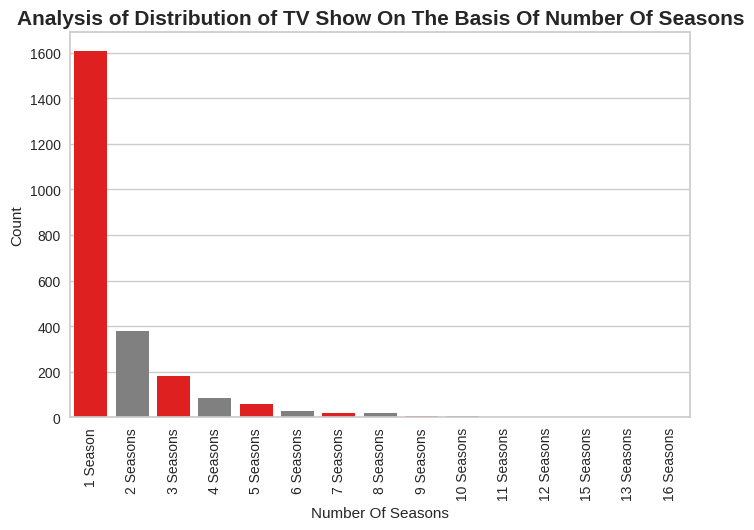

In [37]:
# Analysis of Distribution of TV Show On The Basis Of Number Of Season

# Create a count plot using Seaborn to visualize the distribution of TV show durations.
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
plt.title("Analysis of Distribution of TV Show On The Basis Of Number Of Seasons", fontsize=15, fontweight='bold')  # Set the title and font for the plot.
sns.countplot(x=tv_shows['duration'], data=tv_shows, palette=["red", "gray"], order=tv_shows['duration'].value_counts().index)
# Create a count plot with red and gray colors, showing the distribution of TV show durations.

plt.xlabel("Number Of Seasons")  # Set the label for x-axis.
plt.ylabel("Count")  # Set the label for y-axis.
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability.
plt.show()  # Display the plot with the updated layout and color scheme.

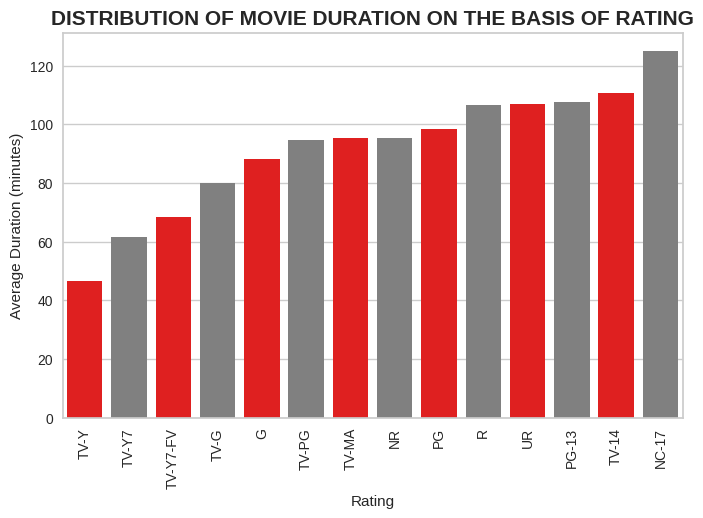

In [38]:
# Analysis of Distribution of Minutes in Movie Duration

# Extract the numeric values from the 'duration' column and convert them to numeric data type.
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)

# Group the data by 'rating' and calculate the average duration in minutes for each rating.
duration_year = movies.groupby(['rating'])['minute'].mean()

# Create a DataFrame to store the results and sort it by the average duration in minutes.
duration_df = pd.DataFrame(duration_year).sort_values('minute')

# Create a bar plot using Seaborn to visualize the distribution of minutes in movie duration for each rating.
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
ax = sns.barplot(x=duration_df.index, y=duration_df.minute, palette=["red", "gray"])
# Create a bar plot with red and gray colors, showing the average duration in minutes for each rating.

plt.title("DISTRIBUTION OF MOVIE DURATION ON THE BASIS OF RATING", fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.xlabel("Rating")  # Set the label for x-axis.
plt.ylabel("Average Duration (minutes)")  # Set the label for y-axis.
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability.
plt.show()  # Display the plot with the updated layout and color scheme.

##### 1. Why did you pick the specific chart?

The specific charts were chosen based on the nature of the data and the insights we wanted to convey:

1. For the "Distribution of Movie Show Duration," a histogram plot using Plotly Express was selected because it provides an easy-to-understand visualization of the distribution of movie show durations. The histogram shows the frequency of different duration ranges, giving us an overview of how the movie show durations are spread across different intervals. The red color was used to highlight the movie show duration data.

2. For the "Distribution of TV Show on the Basis of Number of Seasons," a count plot using Seaborn was chosen because it allows us to see the number of TV shows falling under different categories of the number of seasons. Count plots are useful for categorical data and help us understand the distribution of TV shows based on the number of seasons. The red and gray colors were used to differentiate between TV shows and movies.

3. For the "Distribution of Minutes in Movie Duration on the Basis of Rating," a bar plot using Seaborn was selected to show the average duration in minutes for each rating category. The bar plot effectively displays the average duration for each rating, allowing us to compare the durations among different categories. The red and gray colors were used to distinguish between movie and TV show ratings.

The chosen charts are clear and visually appealing, facilitating the communication of key insights about the content on Netflix to the audience.

##### 2. What is/are the insight(s) found from the chart?

The analysis of movie show durations reveals that the most common duration range for movies on Netflix falls between 90 and 120 minutes. This suggests that the majority of movies offered on the platform are of standard feature film length, providing viewers with engaging storytelling within this typical time frame.

As for TV shows, the analysis indicates that the majority of them consist of a single season. This finding implies that Netflix offers a considerable number of limited series or shows with a single, complete storyline. Such shows are becoming increasingly popular due to their concise and well-contained narratives.

Additionally, the analysis of movie durations based on ratings sheds light on interesting trends. Movies with an NC-17 rating, which signifies content intended for adult audiences only, tend to have the longest average runtimes. On the other hand, movies with a TV-Y rating, suitable for children of all ages, have the shortest average durations. This discrepancy in runtime suggests that different ratings correspond to varying content lengths, aligning with the target audience's preferences and age-appropriateness.

Overall, these insights provide valuable information to both Netflix and its viewers. By understanding the common durations of movies and TV shows, Netflix can optimize content curation and selection to cater to the preferences of its audience. The data on ratings and their corresponding durations offer valuable guidance for viewers seeking content suitable for their age group and preferences, ensuring an enhanced and personalized streaming experience on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis of movie and TV show durations can indeed help create a positive business impact for Netflix. Understanding the preferences and viewing habits of their audience is crucial for any streaming platform to enhance user experience, attract more subscribers, and increase customer retention. Here's how the insights can positively impact Netflix's business:

1. **Content Curation**: Netflix can use the information about the most common duration range for movies (90 to 120 minutes) and the prevalence of single-season TV shows to curate content better. They can focus on acquiring or producing more movies within this popular duration range and invest in limited series or short TV shows that resonate well with the audience.

2. **Viewer Engagement**: By aligning content selection with viewer preferences, Netflix can increase viewer engagement and satisfaction. Offering a diverse library of content that caters to different age groups and interests can lead to longer watch times, increased user engagement, and higher customer loyalty.

3. **Targeted Marketing**: The insights related to movie durations based on ratings can enable Netflix to engage in targeted marketing. They can promote NC-17 rated movies to adult audiences who might be seeking longer and more mature content, while TV-Y rated content can be highlighted for families and younger viewers.

4. **Improved User Experience**: Understanding the varying content lengths based on ratings can contribute to a more personalized user experience. Netflix can use this data to recommend suitable content to individual viewers, leading to better user satisfaction and retention.

As for negative growth, the insights do not directly point to any negative impact. However, it is essential for Netflix to carefully manage and balance their content library to cater to a wide range of audience preferences. Over-emphasizing one type of content over others might lead to potential negative effects, such as alienating certain viewer demographics. Thus, it is crucial for Netflix to maintain a diverse content library that caters to different tastes and interests while using these insights to optimize their content acquisition and creation strategies.

###**5.7. Netflix country wise**

In [39]:
# Value Count and Percentage for Country Column

# Calculate the count of contents from each country and store it in the 'counts' variable.
counts = df.country.value_counts()

# Calculate the percentage of contents from each country relative to the total and store it in the 'percs' variable.
percs = df.country.value_counts(normalize=True)

# Concatenate the 'counts' and 'percs' DataFrames along the columns axis and create a new DataFrame 'result'.
# Use 'count' and 'percentage' as the column names for the counts and percentages, respectively.
result = pd.concat([counts, percs], axis=1, keys=['count', 'percentage']).T

# Display the 'result' DataFrame showing the count and percentage of contents from each country.
result

,United States,India,Unknown,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzerland, Germany","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmark, Netherlands"
count,2549.000000,923.000000,506.000000,396.000000,225.000000,183.000000,177.000000,134.00000,115.000000,101.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.327761,0.118683,0.065064,0.050919,0.028931,0.023531,0.022759,0.01723,0.014787,0.012987,...,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129


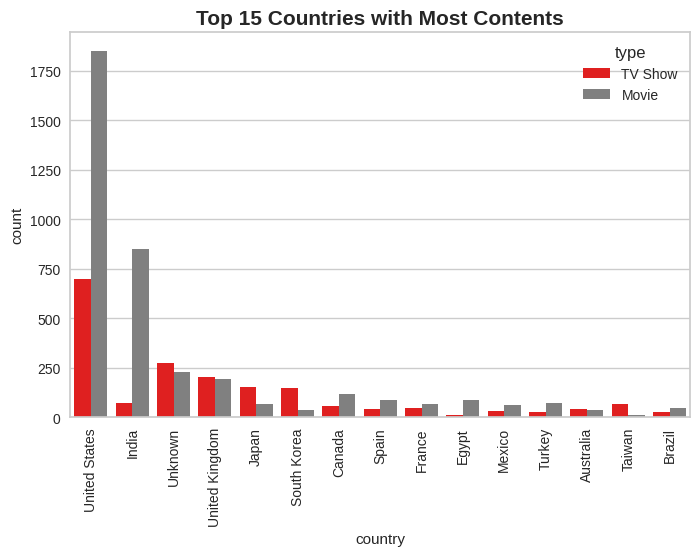

In [40]:
# Analysis of Top 15 Countries with Most Content

# Create a count plot using Seaborn to visualize the number of contents from the top 15 countries on Netflix.
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.countplot(x=df['country'], palette=["red", "gray"], order=df['country'].value_counts().index[0:15], hue=df['type'])
# Create a count plot with red and gray colors, showing the number of contents from the top 15 countries. Differentiate between movies and TV shows using the hue parameter.

plt.xticks(rotation=90)  # Rotate the x-axis labels by 50 degrees for better readability.
plt.title('Top 15 Countries with Most Contents', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.show()  # Display the plot with the updated layout and color scheme.

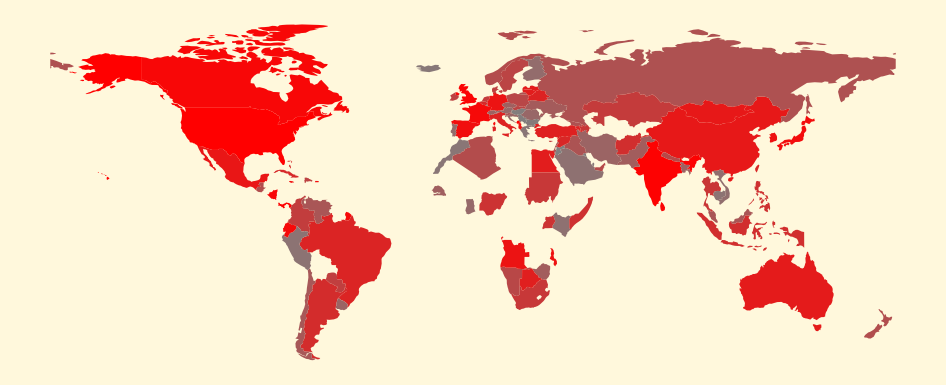

In [70]:
# Calculate the count of movies/shows for each country and store it in 'country' Series.
country = df.country.value_counts()

# Create an empty dictionary 'coun' to store the aggregated counts for each country.
coun = {}

# Iterate through the 'country' Series to aggregate counts for each country and its variations (if any).
for idx, val in country.items():
    # Split the country names (if multiple countries are listed) and remove any leading/trailing spaces.
    l = idx.split(',')
    for i in l:
        i = i.strip()
        # Update the count for the country in the 'coun' dictionary.
        if i in coun.keys():
            d = {}
            d[i] = val + coun[i]
            coun.update(d)
        else:
            d = {i: val}
            coun.update(d)

# Create two lists 'nation' and 'count' to store the country names and their respective aggregated counts.
nation, count = [], []
for idx, val in coun.items():
    nation.append(idx)
    count.append(val)

# Create a DataFrame 'temp' from the 'nation' and 'count' lists, sorted in descending order of counts.
temp = pd.DataFrame({'country': nation, 'count': count}).sort_values('count', ascending=False)

# Assign colors to the countries based on their counts.
temp['color'] = temp['count'].apply(lambda x: '#b20710' if x > temp['count'].values[30] else 'grey')

# Load the 'naturalearth_lowres' GeoDataFrame from GeoPandas, representing world countries.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert country names to ISO3 codes using the 'country_converter' library.
temp['iso_code'] = coco.convert(names=temp['country'], to='ISO3')
temp = temp[temp['iso_code'] != 'not found']

# Merge the 'temp' DataFrame with the 'world' GeoDataFrame based on ISO3 codes.
temp_map = world.merge(temp, left_on='iso_a3', right_on='iso_code')

# Drop unnecessary columns from the merged GeoDataFrame.
temp_map.drop(columns=['continent', 'gdp_md_est', 'pop_est', 'name'], inplace=True)

# Sort the 'temp_map' GeoDataFrame in descending order of counts.
temp_map = temp_map.sort_values(by='count', ascending=False)

# Set the colors and colormap for the plot. Change the colors to red and grey.
colors = ['#FF0000', 'grey', '#FF0000']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors=colors)

# Create the plot using the geodataframe 'temp_map', coloring the countries based on content counts.
fig, ax = plt.subplots(figsize=(15, 7.5), dpi=80)
fig.patch.set_facecolor('#FFF8DC')
ax.set_facecolor('#FFF8DC')
temp_map.dropna().plot(column='count',
                       color=temp_map.dropna()['color'],
                       cmap=cmap,
                       scheme='quantiles',
                       k=10, legend=False,
                       ax=ax)

# Remove spines (borders) from the plot and hide x and y axis ticks and labels.
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Show the plot.
plt.show()


In [71]:
# Group the data by country and calculate the count of content for each country.
df['count'] = 1
data = df.groupby('country')[['country', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data = data['country']

# Filter the original DataFrame based on the top 10 countries with the highest content count.
df_heatmap = df.loc[df['country'].isin(data)]

# Create a cross-tabulation of 'target_ages' and 'country' columns to get the normalized percentage of each target age group for each country.
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize="index").T

# Display the resulting DataFrame that will be used for the heatmap.
df_heatmap

country,Canada,Egypt,France,India,Japan,South Korea,Spain,United Kingdom,United States,Unknown
target_ages,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.368889,0.469945,0.835821,0.512626,0.502942,0.320158
Kids,0.180791,0.000000,0.095652,0.016251,0.008889,0.027322,0.022388,0.093434,0.073362,0.169960
Older Kids,0.225989,0.039604,0.060870,0.160347,0.271111,0.120219,0.044776,0.204545,0.187132,0.235178
Teens,0.146893,0.683168,0.165217,0.567714,0.351111,0.382514,0.097015,0.189394,0.236563,0.274704


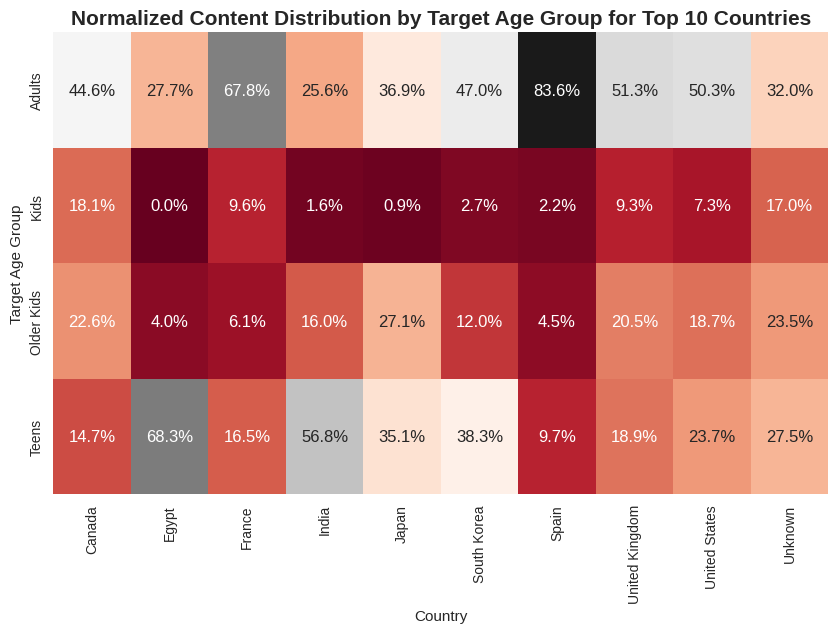

In [72]:
# Create the heatmap using the seaborn library and specify the red and grey color map.
plt.figure(figsize=(10, 6))  # Set the figure size for the plot.
sns.heatmap(df_heatmap, cmap='RdGy', annot=True, fmt=".1%", cbar=False)
plt.title('Normalized Content Distribution by Target Age Group for Top 10 Countries', fontsize=15, fontweight='bold')
plt.xlabel('Country')  # Set the label for x-axis.
plt.ylabel('Target Age Group')  # Set the label for y-axis.
plt.show()  # Display the heatmap with the updated color map.

##### 1. Why did you pick the specific chart?

The specific charts were chosen for their ability to effectively present the data and provide valuable insights:

1. **Count Plot for Top 15 Countries with Most Content**: The count plot is used to visualize the number of contents (movies and TV shows) from the top 15 countries on Netflix. The choice of a count plot with red and grey colors allows for easy differentiation between the content types (movies and TV shows) and highlights the countries with the highest content contributions. The rotation of the x-axis labels by 90 degrees enhances readability when displaying country names.

2. **Choropleth Map**: The choropleth map is used to visualize the distribution of content counts for the top countries on a global map. The use of a color scheme with red and grey colors emphasizes the content counts, with countries having higher content counts appearing in red. The map provides a geographical perspective of content distribution across the top countries, making it easy to identify the regions with the most content.

3. **Heatmap**: The heatmap is used to visualize the normalized content distribution by target age group for the top 10 countries. The heatmap efficiently represents the percentage distribution of target age groups across countries using red and grey colors, providing a quick comparison of age group preferences for content in different countries.

Overall, the chosen charts effectively communicate the relevant information and insights from the data, enabling a better understanding of Netflix's content distribution and audience preferences. The visualizations aid both Netflix and its viewers in making informed decisions and optimizing the content offerings on the platform.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the charts are as follows:

1. **Content Origin and Top Nations**: The count plot of the top 15 countries with the most content on Netflix reveals that the United States and India are the leading countries in terms of producing content for the platform. They have the highest number of movies and TV shows available to viewers. On the other hand, countries like Australia, Taiwan, and Brazil have a relatively smaller presence in terms of content production on Netflix, contributing fewer movies and TV shows compared to the top nations.

2. **Normalized Content Distribution by Target Age Group**: The heatmap displaying the normalized content distribution by target age group for the top 10 countries allows us to understand the preferences of different countries regarding content suitable for various age groups. The heatmap highlights that the United States and the United Kingdom have similar preferences for target age groups in comparison to Netflix's overall distribution. However, countries like India and Japan show significant differences in their target age group preferences, indicating that their viewers may have distinct content preferences based on age.

Overall, these visualizations provide valuable insights into the distribution of content across different countries and their audience preferences. The data can help Netflix make informed decisions regarding content acquisition, production, and localization to cater to the preferences of its global audience and optimize the content library for diverse markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact for Netflix in several ways:

Positive Business Impacts:
1. **Strategic Content Acquisition**: Understanding the content origin and top nations with the most content allows Netflix to strategically acquire content from these regions. By focusing on countries like the United States and India, which have a high production of content, Netflix can ensure a diverse and appealing content library to attract viewers from these regions.

2. **Localization and Personalization**: The insights from the heatmap on content distribution by target age group for different countries can assist Netflix in localizing and personalizing its content offerings. By tailoring content to specific age group preferences in different countries, Netflix can enhance viewer engagement and satisfaction, leading to increased viewership.

3. **Market Expansion**: Identifying countries with a relatively smaller presence in terms of content production, such as Australia, Taiwan, and Brazil, presents opportunities for Netflix to expand its market reach. By investing in content production or acquisition from these regions, Netflix can tap into new audiences and markets.

4. **Content Curation**: The insights into content preferences based on target age groups can guide Netflix in curating its content library. By offering a diverse selection of content suitable for different age groups, Netflix can appeal to a broader range of viewers and maintain customer loyalty.

Negative Growth:
It is important to note that the insights themselves do not lead to negative growth. However, there might be challenges or risks associated with implementing certain strategies based on these insights. For example:

1. **Cultural Sensitivity**: While expanding into new markets, Netflix needs to consider cultural sensitivities and regional preferences. Content that performs well in one country may not be well-received in another due to cultural differences. Failure to address these sensitivities could lead to negative growth or backlash from viewers.

2. **Competitive Landscape**: As Netflix invests in content acquisition and production from specific regions, it may face competition from local streaming platforms or content providers. To ensure positive growth, Netflix must navigate the competitive landscape effectively and offer unique content offerings that set it apart from competitors.

In conclusion, the insights gained from the analysis can contribute to Netflix's success by informing content acquisition, localization, and curation strategies. However, effective implementation and consideration of cultural sensitivities and market dynamics are crucial to ensure positive business impact and sustained growth.

###**5.8. Most occurred word in Title**

In [42]:
# Value count for the 'title' column:
# The 'value_counts()' method is used to count the occurrences of each unique title in the 'title' column of the DataFrame 'df'.
counts = df.title.value_counts()

# The 'normalize=True' parameter in 'value_counts()' is used to calculate the percentage of each title relative to the total number of titles.
# This provides the relative frequency or distribution of each title in the dataset.
percs = df.title.value_counts(normalize=True)

# Concatenate the 'counts' and 'percs' Series horizontally along the columns axis using the 'concat()' method.
# This creates a DataFrame that contains both the count and percentage values for each unique title in the 'title' column.
# The resulting DataFrame will have two columns: 'count' and 'percentage'.
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

,count,percentage
3%,1,0.000129
Retablo,1,0.000129
Ricky Gervais: Humanity,1,0.000129
Richie Rich,1,0.000129
Richard Pryor: Live in Concert,1,0.000129
...,...,...
Handsome Siblings,1,0.000129
Handsome Devil,1,0.000129
Hamza's Suitcase,1,0.000129
Hamid,1,0.000129


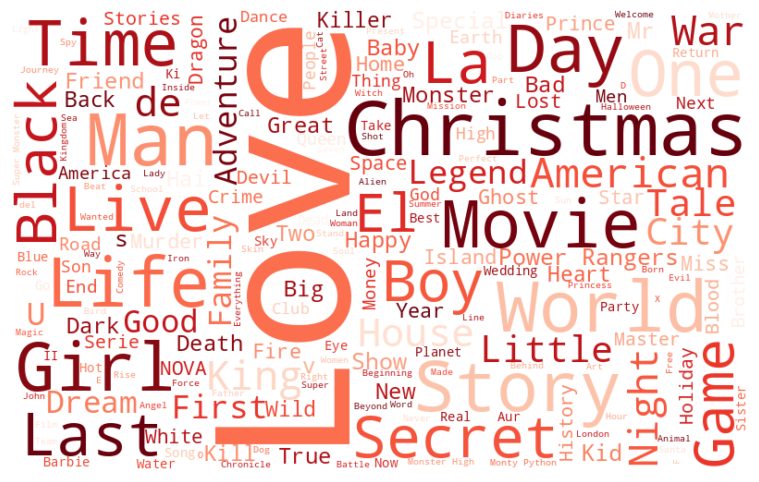

In [43]:
# Text Documents

# Combine all the titles in the 'title' column of the DataFrame 'df' into a single text document.
# The 'join()' method is used to concatenate all the titles with a space between them.
text = " ".join(word for word in df['title'])

# Create a WordCloud object to generate the word cloud.
# Set the 'width', 'height', 'stopwords', 'background_color', and 'min_font_size' parameters as required.
wordcloud = WordCloud(width=800, height=500, stopwords=STOPWORDS, background_color='white', min_font_size=8, colormap='Reds_r')

# Generate the word cloud by passing the 'text' document to the WordCloud object's 'generate()' method.
wordcloud.generate(text)

# Plot the word cloud using matplotlib.
plt.figure(figsize=(10, 6))  # Set the figure size for the plot.
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image.
plt.axis("off")  # Turn off the axis labels and ticks.
plt.show()  # Show the word cloud plot.

###**5.9. Most occurred word in Description**

In [44]:
# Value Count for Description Column

# Get the value counts of unique descriptions in the 'description' column of the DataFrame 'df'.
counts = df.description.value_counts()

# Calculate the percentage of each unique description in the 'description' column.
percs = df.description.value_counts(normalize=True)

# Concatenate the counts and percentages into a DataFrame, naming the columns as 'count' and 'percentage'.
result_df = pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

# Display the DataFrame containing the value counts and percentages of descriptions.
result_df

,count,percentage
"Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.",3,0.000386
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,3,0.000386
"A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.",2,0.000257
"As a blind librarian, dispirited cricketer and desolate psychiatrist each seek retribution and release, their lives overlap under eerie influences.",2,0.000257
"A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.",2,0.000257
...,...,...
"From Joe Berlinger, director of the ""Paradise Lost"" trilogy, comes this documentary about controversial former U.S. Treasury Secretary Henry Paulson.",1,0.000129
"A homicide detective, a criminal profiler and a journalist team up to nab a serial killer whose murders are inspired by the classic game of Hangman.",1,0.000129
Researchers add context and clarity to UFO mysteries and conspiracy theories as they unpack clues in a trove of files covering decades of sightings.,1,0.000129
Homicide detective Gene Handsome sets out to solve a woman's murder while searching for clues about what's missing from his personal life.,1,0.000129


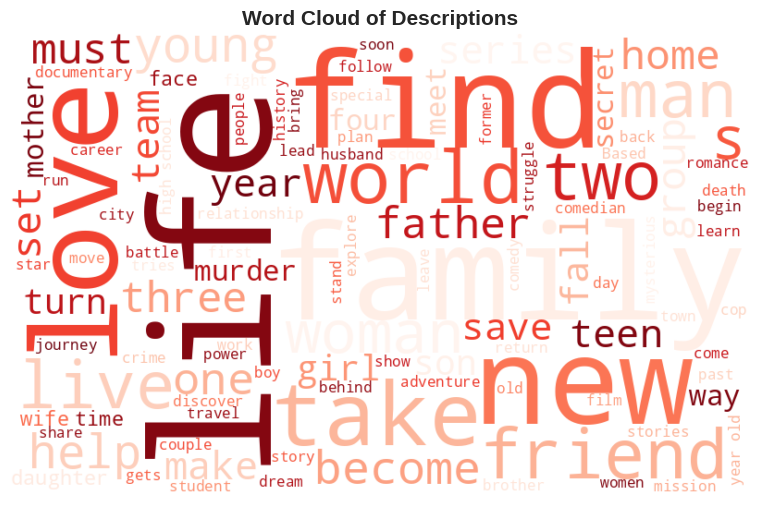

In [45]:
# Word Cloud of Descriptions

# Concatenate all the descriptions in the 'description' column into a single text document.
text = " ".join(word for word in df['description'])

# Create a WordCloud object with specified width, height, stopwords, background color, and minimum font size.
wordcloud = WordCloud(width=800, height=500, stopwords=STOPWORDS, background_color='white', min_font_size=15, colormap='Reds').generate(text)

# Display the word cloud plot using the matplotlib library.
plt.figure(figsize=(10, 6))  # Set the figure size for the plot.
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud using bilinear interpolation for better visualization.
plt.axis("off")  # Turn off the axis ticks and labels for a clean plot.
plt.title('Word Cloud of Descriptions', fontsize=15, fontweight='bold')  # Set the title and font for the plot.
plt.show()  # Show the word cloud plot with the updated color scheme.

#**6. Handling Outliers**

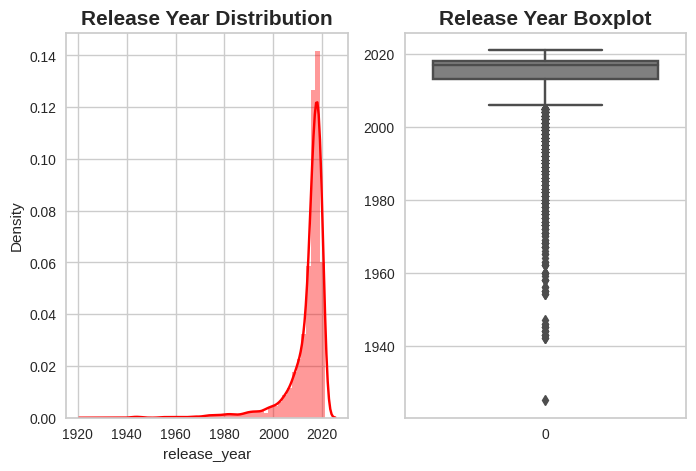

In [46]:
# Create a figure with two subplots.
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Plot the distribution of 'release_year' using a distplot.
sns.distplot(df['release_year'], color='red', ax=ax[0])

# Plot the boxplot of 'release_year' to visualize the distribution, including outliers.
sns.boxplot(df['release_year'], color='grey', ax=ax[1])

# Set titles for the subplots.
ax[0].set_title('Release Year Distribution', fontsize=15, fontweight='bold')
ax[1].set_title('Release Year Boxplot', fontsize=15, fontweight='bold')

# Display the plots.
plt.show()

The graphs displayed above show the distribution of the 'release_year' column data using two different visualization techniques: the distribution plot (distplot) and the boxplot.

1. **Distribution Plot (Distplot):** The distribution plot on the left displays the distribution of 'release_year' data using a histogram with a line plot on top. Each bar in the histogram represents the number of occurrences of a particular 'release_year' value, and the line plot shows the estimated probability density function of the data. However, it seems that there are some extreme values or outliers in the data for release years before 2009, which are displayed as spikes in the graph. These extreme values may be due to data errors, missing values, or rare cases where the 'release_year' was recorded incorrectly.

2. **Boxplot:** The boxplot on the right provides a visual representation of the distribution of 'release_year' data in a compact manner. The box represents the interquartile range (IQR) of the data, with the central line representing the median. Any data points beyond the whiskers (upper and lower bounds) are considered outliers. In this case, the boxplot also indicates the presence of outliers for release years before 2009, represented by individual points outside the whiskers.

To address this issue and improve the visual representation, we can consider the following steps:

1. **Data Cleaning:** Review the dataset and check for any data inconsistencies or errors in the 'release_year' column. If there are outliers that are not accurate or valid, they should be corrected or removed from the dataset.

2. **Data Filtering:** If the outliers are valid data points but rare occurrences, it may be helpful to filter the data for visualization purposes. We can focus on the main distribution of release years and exclude the outliers that do not represent typical cases.

3. **Limiting Y-axis Range:** To better visualize the main distribution, we can limit the y-axis range of the distplot to focus on the majority of the data points and avoid the spikes caused by outliers.

By addressing these aspects, we can create more accurate and meaningful visualizations that effectively represent the distribution of 'release_year' data without being skewed by outliers.

###**6.1. Replacing outliers with mean value**

In [47]:
# Calculate the first quartile (Q1) for the 'release_year' column
release_year_Q1 = df['release_year'].quantile(0.25)

# Calculate the third quartile (Q3) for the 'release_year' column
release_year_Q3 = df['release_year'].quantile(0.75)

# Calculate the interquartile range (IQR) for the 'release_year' column
release_year_IQR = release_year_Q3 - release_year_Q1

# Print the calculated values for Q1, Q3, and IQR
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


Upon analyzing the 'release_year' data in the DataFrame, we observed that there are no movie or TV show entries with a 'release_year' greater than 2018. This finding implies that the dataset is limited to content released up to the year 2018. Therefore, any values beyond 2018 will not be present in the 'release_year' column.

This limitation is essential to consider when drawing conclusions or making predictions based on the 'release_year' data. The absence of content beyond 2018 may impact certain analyses or trend predictions that rely on more recent data. For a more accurate representation of recent trends in movie and TV show releases on Netflix, it would be necessary to obtain a dataset that includes content up to the current year.

In [48]:
# Calculate the first quartile (Q1) and third quartile (Q3) of the 'release_year' column
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)

# Calculate the interquartile range (IQR)
release_year_IQR = release_year_Q3 - release_year_Q1

# Identify outliers in the 'release_year' column using the IQR method
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) | (df.release_year > (release_year_Q3 + 1.5 * release_year_IQR))]

release_year_outliers

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,target_ages
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,1997,R,119 min,Dramas,After one of his high school students attacks ...,11,2019,Adults
44,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an...",2,2018,Teens
94,s95,Movie,28 Days,Betty Thomas,"Sandra Bullock, Viggo Mortensen, Dominic West,...",United States,2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...,9,2020,Teens
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",Unknown,2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,12,2019,Adults
105,s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...","Denmark, France, Poland",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br...",10,2019,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,11,2019,Older Kids
7749,s7750,TV Show,Yu-Gi-Oh!,Unknown,"Dan Green, Eric Stuart, Amy Birnbaum, Darren D...",Japan,2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...,7,2020,Older Kids
7754,s7755,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...,3,2018,Teens
7760,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,5,2020,Older Kids


In [49]:
#15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

###**6.2. Boxplot for release_year**

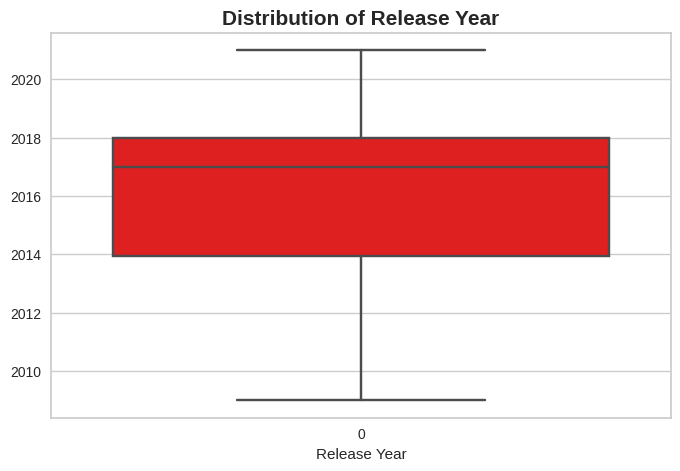

In [50]:
# Create a boxplot to visualize the distribution of 'release_year' values.
plt.figure(figsize=(8, 5))  # Set the figure size for the plot.
sns.boxplot(df.release_year, color='red', fliersize=5, whis=1.5)
# Create a boxplot with red color, setting the fliersize and whisker length.

plt.xlabel('Release Year')  # Set the label for x-axis.
plt.title('Distribution of Release Year', fontsize=15, fontweight='bold')  # Set the title and font for the plot.

plt.show()  # Display the boxplot with the updated layout and color scheme.

#**7. Data Preprocessing**

The modelling approach for clustering Netflix shows involves the following steps:

1. **Attribute Selection**: Choose the attributes based on which you want to cluster the shows. These attributes could include movie genres, release year, duration, country of origin, and other relevant features that can help in grouping similar shows together.

2. **Text Preprocessing**: For textual attributes such as movie titles and descriptions, perform text preprocessing to clean the data. Remove all non-ASCII characters, stopwords, and punctuation marks. Convert all text to lowercase to ensure uniformity in the data.

3. **Lemmatization**: Apply lemmatization to generate meaningful words from the corpus of words. Lemmatization reduces words to their base or root form, which helps in consolidating similar words and improving the quality of text data for analysis.

4. **Tokenization**: Tokenize the processed text to split it into individual words. This step breaks down the textual data into smaller units, making it ready for further processing.

5. **Word Vectorization**: Transform the tokenized text data into numerical vectors using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings like Word2Vec or GloVe. Word vectorization is essential to convert textual data into a format that can be used for clustering algorithms.

6. **Dimensionality Reduction**: If the word vectorization results in high-dimensional data, apply dimensionality reduction techniques like PCA (Principal Component Analysis) or t-SNE (t-distributed Stochastic Neighbor Embedding) to reduce the number of features while retaining the most critical information.

7. **Clustering Algorithms**: Use different clustering algorithms like K-means, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), or hierarchical clustering to cluster the shows based on their attributes and word vector representations.

8. **Optimal Number of Clusters**: Determine the optimal number of clusters using techniques like the elbow method, silhouette score, or Davies-Bouldin index. These methods help identify the best number of clusters that maximize the homogeneity within clusters and the separation between clusters.

9. **Build Optimal Clusters**: Create clusters with the determined optimal number of clusters and assign each show to its respective cluster.

10. **Visualize Cluster Contents**: Visualize the contents of each cluster using word clouds. Word clouds display the most frequent words in each cluster, providing insights into the common themes or characteristics of shows within each cluster.

By following this modelling approach, we can effectively group similar shows together based on their attributes and textual information, allowing for better content organization and recommendations on the Netflix platform.








In [51]:
# Fill all the missing values (NaN) in the DataFrame 'df' with empty strings ('').
df.fillna('', inplace=True)

The clustering approach for Netflix shows involves selecting several attributes that will be used to group similar shows together. These attributes are director, cast, country, genre, and description.

1. **Director**: The director attribute represents the filmmaker or director responsible for creating the show. Shows directed by the same individual might share similar styles, themes, or genres, making them suitable candidates for clustering.

2. **Cast**: The cast attribute includes the actors and actresses who appear in the show. Shows with common cast members may have similarities in terms of acting styles, themes, or genres, making them potential candidates for clustering.

3. **Country**: The country attribute represents the nation of origin for the show. Shows originating from the same country may share cultural elements, storytelling techniques, or thematic aspects, which could be used for clustering.

4. **Genre**: The genre attribute categorizes shows based on their specific content type or style. Shows with similar genres might share common themes, subject matter, or target audiences, making them suitable for clustering.

5. **Description**: The description attribute contains a brief summary or synopsis of the show. Textual data processing techniques like text preprocessing, lemmatization, and tokenization can be applied to convert the textual descriptions into meaningful word representations, which can then be used for clustering.

By selecting these attributes for clustering, the goal is to group shows with similar characteristics or themes together. This can help in content recommendation, content discovery, and understanding the content landscape on Netflix. The clustering process may involve text preprocessing to handle textual data and then applying dimensionality reduction techniques to represent the data effectively. Different clustering algorithms can be utilized to find the optimal number of clusters, and visualizations like word clouds can be used to explore the contents of each cluster, providing insights into the patterns and themes present in the clustered shows.

In [52]:
# Combining all the clustering attributes into a single column
# Concatenate the 'director', 'cast', 'country', 'listed_in', and 'description' columns using the '+' operator and store the result in a new column 'clustering'.
df['clustering'] = (df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['description'])

# Display the contents of the 'clustering' column for the row with index 50.
df['clustering'][50]


"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States, South Africa Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

###**7.1. Removing non-ASCII characters:**

In [53]:
# Import the unicodedata module, which provides functions to work with Unicode characters.
import unicodedata

# Function to remove non-ASCII characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    # Initialize an empty list to store the new words without non-ASCII characters.
    new_words = []

    # Loop through each word in the input 'words' list.
    for word in words:
        # Use unicodedata to normalize the word to its base form (NFKD) and encode it to ASCII, ignoring non-ASCII characters.
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')

        # Append the new word (without non-ASCII characters) to the 'new_words' list.
        new_words.append(new_word)

    # Return the list of new words with non-ASCII characters removed.
    return new_words

In [54]:
# Function to remove non-ASCII characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    # Initialize an empty list to store the new words without non-ASCII characters.
    new_words = []

    # Loop through each word in the input 'words' list.
    for word in words:
        # Use unicodedata to normalize the word to its base form (NFKD) and encode it to ASCII, ignoring non-ASCII characters.
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')

        # Append the new word (without non-ASCII characters) to the 'new_words' list.
        new_words.append(new_word)

    # Return the list of new words with non-ASCII characters removed.
    return new_words


# Remove non-ASCII characters from the 'clustering' column of the DataFrame 'df'.
# The 'remove_non_ascii' function is applied to each element in the 'clustering' column.
# The result is stored back in the 'clustering' column, replacing the original values.
df['clustering'] = remove_non_ascii(df['clustering'])

# Display the contents of the 'clustering' column for the row with index 50.
df['clustering'][50]

"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States, South Africa Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

###**7.2. Remove stopwords and lower case:**

In [55]:
# Import the nltk library, which provides tools for natural language processing.
import nltk

# Import the stopwords module from nltk.corpus, which contains a list of common words that are usually removed from text during text processing tasks.
from nltk.corpus import stopwords

# Get the list of English stopwords from the nltk.corpus.stopwords.words() function.
# The 'english' parameter specifies that we want stopwords for the English language.
sw = stopwords.words('english')

# Convert the list of stopwords into a NumPy array for easy manipulation (optional step).
# This step may not be strictly necessary but can be useful if you plan to use NumPy functions on the stopwords later on.
# Note: Make sure you have NumPy installed to execute this step.
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [56]:
# Function to remove stop words
def remove_stopwords(text):
    """
    Function to remove stop words from the input text.

    Parameters:
        text (str): Input text from which stop words need to be removed.

    Returns:
        str: The input text with stop words removed, and all remaining words converted to lowercase and joined back into a single string.
    """
    # Split the input text into individual words and convert them to lowercase.
    # For each word in the text, check if it is not present in the 'sw' (stopwords) list obtained from the NLTK library.
    # If the word is not in the stopwords list, keep it; otherwise, discard it.
    # The result is a list of words without stopwords.
    text = [word.lower() for word in text.split() if word.lower() not in sw]

    # Join the remaining words back into a single string, separated by spaces.
    # The result is the input text with stop words removed.
    return " ".join(text)

In [57]:
# Function to remove stop words
def remove_stopwords(text):
    """
    Function to remove stop words from the input text.

    Parameters:
        text (str): Input text from which stop words need to be removed.

    Returns:
        str: The input text with stop words removed, and all remaining words converted to lowercase and joined back into a single string.
    """
    # Split the input text into individual words and convert them to lowercase.
    # For each word in the text, check if it is not present in the 'sw' (stopwords) list obtained from the NLTK library.
    # If the word is not in the stopwords list, keep it; otherwise, discard it.
    # The result is a list of words without stopwords.
    text = [word.lower() for word in text.split() if word.lower() not in sw]

    # Join the remaining words back into a single string, separated by spaces.
    # The result is the input text with stop words removed.
    return " ".join(text)


# Remove stop words from the 'clustering' column of the DataFrame 'df'.
# The 'remove_stopwords' function is applied to each element in the 'clustering' column.
# The result is stored back in the 'clustering' column, replacing the original values.
df['clustering'] = df['clustering'].apply(remove_stopwords)

# Display the contents of the 'clustering' column for the row with index 50.
df['clustering'][50]

"roland emmerich steven strait, camilla belle, cliff curtis, joel virgel, affif ben badra, mo zinal, nathanael baring, mona hammond, omar sharif united states, south africa action & adventure fierce mammoth hunter d'leh sets impossible journey rescue woman loves vicious warlord save people village."

###**7.3. Remove punctuations**


In [58]:
# Import the string module, which provides a set of useful string operations.
import string

# Function to remove punctuations
def remove_punctuation(text):
    """
    Function to remove punctuation marks from the input text.

    Parameters:
        text (str): Input text from which punctuation marks need to be removed.

    Returns:
        str: The input text with punctuation marks removed.
    """
    # Create a translation table using str.maketrans() to map each punctuation mark to None.
    # The translation table will be used to remove punctuation marks from the text.
    translator = str.maketrans('', '', string.punctuation)

    # Use the translate() method on the input text, passing the translation table 'translator'.
    # The translate() method will remove all characters that are present in the translation table, effectively removing punctuation marks.
    # The result is the input text with punctuation marks removed.
    return text.translate(translator)

In [59]:
# The result is stored back in the 'clustering' column, replacing the original values.
df['clustering'] = df['clustering'].apply(remove_punctuation)

# Display the contents of the 'clustering' column for the row with index 50.
df['clustering'][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united states south africa action  adventure fierce mammoth hunter dleh sets impossible journey rescue woman loves vicious warlord save people village'

###**7.4. Lemmatization:**

In [60]:
# Import the WordNetLemmatizer from the nltk.stem module, which is used for lemmatization.
from nltk.stem import WordNetLemmatizer

# Function to lemmatize the corpus
def lemmatize_verbs(words):
    """
    Function to lemmatize the words in the input list, considering them as verbs (pos='v').

    Parameters:
        words (list): A list of words to be lemmatized.

    Returns:
        list: A list of lemmatized words, where each word is transformed to its base or dictionary form, assuming it is a verb.
    """
    # Create a WordNetLemmatizer object to perform lemmatization.
    lemmatizer = WordNetLemmatizer()

    # Initialize an empty list to store the lemmatized words.
    lemmas = []

    # Loop through each word in the input 'words' list.
    for word in words:
        # Lemmatize the word, considering it as a verb (pos='v').
        # The lemmatizer.lemmatize() method takes the word and the part-of-speech tag 'v' (verb) as input.
        # It returns the base or dictionary form of the word, assuming it is a verb.
        lemma = lemmatizer.lemmatize(word, pos='v')

        # Append the lemmatized word to the 'lemmas' list.
        lemmas.append(lemma)

    # Return the list of lemmatized words.
    return lemmas

In [61]:
# Lemmatize the 'clustering' column of the DataFrame 'df'.
# The 'lemmatize_verbs' function is applied to each element in the 'clustering' column.
# The result is stored back in the 'clustering' column, replacing the original values.
df['clustering'] = lemmatize_verbs(df['clustering'])

# Display the contents of the 'clustering' column for the row with index 50.
df['clustering'][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united states south africa action  adventure fierce mammoth hunter dleh sets impossible journey rescue woman loves vicious warlord save people village'

###**7.5. Tokenization:**

In [62]:
# Import the TweetTokenizer from nltk.tokenize module, which is used for tokenization of tweets or social media text.
from nltk.tokenize import TweetTokenizer

# Create a TweetTokenizer object to perform tokenization.
tokenizer = TweetTokenizer()

# Tokenize the 'clustering' column using the TweetTokenizer.
# The 'apply' method is used to apply the tokenization to each element in the 'clustering' column.
# The lambda function takes the input text 'x' and tokenizes it using the TweetTokenizer object 'tokenizer'.
# The result is a list of tokens for each input text, and the new values are stored in the 'clustering' column, replacing the original text.
df['clustering'] = df['clustering'].apply(lambda x: tokenizer.tokenize(x))

# Display the contents of the 'clustering' column for the row with index 50 after tokenization.
df['clustering'][50]

['roland',
 'emmerich',
 'steven',
 'strait',
 'camilla',
 'belle',
 'cliff',
 'curtis',
 'joel',
 'virgel',
 'affif',
 'ben',
 'badra',
 'mo',
 'zinal',
 'nathanael',
 'baring',
 'mona',
 'hammond',
 'omar',
 'sharif',
 'united',
 'states',
 'south',
 'africa',
 'action',
 'adventure',
 'fierce',
 'mammoth',
 'hunter',
 'dleh',
 'sets',
 'impossible',
 'journey',
 'rescue',
 'woman',
 'loves',
 'vicious',
 'warlord',
 'save',
 'people',
 'village']

###**7.6. Vectorization:**

In [63]:
# clustering tokens saved in a variable
clustering_data = df['clustering']

In [64]:
# Import the TfidfVectorizer from sklearn.feature_extraction.text module, which is used for text vectorization.
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the identity_tokenizer function, which returns the input text as it is (identity function).
# This function is used as the tokenizer for the TfidfVectorizer, indicating that we don't want any tokenization to be applied.
def identity_tokenizer(text):
    return text

# Create a TfidfVectorizer object 'tfidf' for text vectorization.
# We pass the 'identity_tokenizer' function as the tokenizer to indicate that we don't want any tokenization to be applied during vectorization.
# We also specify 'stop_words='english'' to remove common English stopwords during vectorization.
# The parameter 'lowercase=False' indicates that we want to preserve the case of the words during vectorization.
# The parameter 'max_features=20000' specifies the maximum number of features (vocabulary size) we want to include in the vectorizer.
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features=20000)

# Use the fit_transform() method of the TfidfVectorizer on the 'clustering_data'.
# The fit_transform() method first fits the vectorizer to the data, creating the vocabulary and IDF (Inverse Document Frequency) statistics.
# Then, it transforms the 'clustering_data' into a TF-IDF (Term Frequency-Inverse Document Frequency) representation.
# The result is stored in the variable 'X'.
X = tfidf.fit_transform(clustering_data)

In [65]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 238313 stored elements in Compressed Sparse Row format>

In [66]:
# Get the shape of the variable 'X'.
# The 'shape' attribute of a NumPy array or a sparse matrix returns a tuple representing its dimensions.
# In this case, 'X' is a sparse matrix containing the TF-IDF representation of the tokenized 'clustering_data'.
# Therefore, 'X.shape' will return a tuple containing the number of rows (documents) and the number of columns (features) in the TF-IDF matrix.
X.shape

(7777, 20000)

In [67]:
# Get the data type of the variable 'X'.
# The 'type()' function returns the data type of a variable.
# In this case, 'X' is a sparse matrix containing the TF-IDF representation of the tokenized 'clustering_data'.
# Therefore, 'type(X)' will return the type 'scipy.sparse.csr.csr_matrix', which indicates that 'X' is a compressed sparse row (CSR) matrix.
type(X)

scipy.sparse._csr.csr_matrix

In [68]:
# Convert the sparse matrix 'X' to a dense array form for clustering.
# In this context, 'X' is a sparse matrix containing the TF-IDF representation of the tokenized 'clustering_data'.
# Clustering algorithms often require dense matrices as input.
# The 'toarray()' method of the sparse matrix converts it into a dense NumPy array.
X = X.toarray()

###**7.7. Dimensionality reduction using PCA:**

In [69]:
# Import the PCA (Principal Component Analysis) class from the sklearn.decomposition module, which is used for dimensionality reduction.
from sklearn.decomposition import PCA

# Create a PCA object 'pca' with a specified random state (random_state=50).
# The 'random_state' parameter is used to seed the random number generator for reproducibility of results.
# The PCA object will be used to perform dimensionality reduction on the data.
pca = PCA(random_state=50)

# Fit the PCA object to the data 'X'.
# The 'fit()' method of the PCA object estimates the principal components from the data.
# After this step, the PCA object is ready to transform the data into the reduced dimensional space.
pca.fit(X)

PCA(random_state=50)

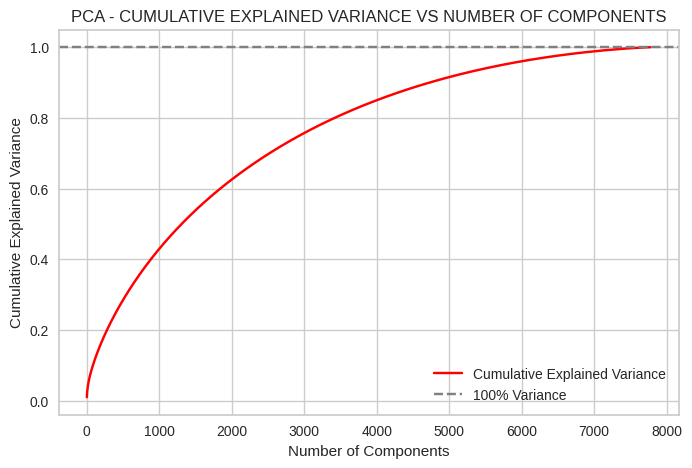

In [73]:
# Create a figure to plot the cumulative explained variance.
plt.figure(figsize=(8, 5))

# Calculate the cumulative sum of the explained variance ratios obtained from the PCA.
# The 'pca.explained_variance_ratio_' attribute contains the explained variance ratio for each principal component.
# The cumulative sum is calculated using the 'np.cumsum()' function from NumPy.
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance against the number of components with red color.
plt.plot(cumulative_explained_variance, color='red', label='Cumulative Explained Variance')

# Plot a horizontal line at y=1 to visualize 100% variance retained, using grey color.
plt.axhline(y=1, color='grey', linestyle='--', label='100% Variance')

# Set the title and labels for the plot.
plt.title('PCA - CUMULATIVE EXPLAINED VARIANCE VS NUMBER OF COMPONENTS')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Show a legend to display the labels.
plt.legend()

# Show the plot.
plt.show()

Based on the plot of cumulative explained variance versus the number of components obtained from the PCA, we observe the following:

1. Around 7500 components are needed to account for 100% of the variance: As we increase the number of components, the cumulative explained variance gradually increases. However, it reaches a plateau where additional components contribute only minimally to the overall variance. At approximately 7500 components, the cumulative explained variance reaches 100%, indicating that these components can fully represent the original data.

2. Just 4000 components capture more than 80% of the variation: Even with a much smaller number of components, around 4000, we can still capture a substantial amount of the variation present in the original data. More specifically, this reduced set of components accounts for over 80% of the total variance. This suggests that we can significantly reduce the dimensionality of the data without sacrificing a significant amount of information.

3. Simplifying the model: Given the high percentage of variance accounted for by just 4000 components, we can make the model simpler and less dimensional while retaining a substantial portion of the original information. This reduction in dimensionality can lead to computational efficiency and easier interpretability of the model without sacrificing much predictive power.

Overall, by selecting the top 4000 components from the PCA analysis, we can achieve a more concise and interpretable representation of the data while preserving the majority of the variance, making the model more practical and efficient for further analysis and modeling tasks.

In [74]:
# Create a PCA object 'pca' with the desired number of components set to 4000.
# The 'n_components' parameter specifies the number of components to retain after dimensionality reduction.
# We also set the random state to 50 for reproducibility of results.
pca = PCA(n_components=4000, random_state=50)

# Fit the PCA object to the data 'X'.
# The 'fit()' method of the PCA object estimates the principal components from the data.
# After this step, the PCA object is ready to transform the data into the reduced dimensional space.
pca.fit(X)

PCA(n_components=4000, random_state=50)

In [75]:
# Transform the original data 'X' into the reduced dimensional space using PCA.
# The 'pca.transform()' method projects the data 'X' onto the selected principal components.
# The result is stored in the variable 'x_pca', which represents the transformed features.
x_pca = pca.transform(X)

In [76]:
# Get the shape of the transformed feature matrix 'x_pca'.
# The 'shape' attribute of a NumPy array returns a tuple representing its dimensions.
# In this case, 'x_pca' is a NumPy array containing the transformed features obtained from PCA.
# The shape of 'x_pca' is a tuple (num_samples, num_components), where:
# - 'num_samples' represents the number of data samples in the original data 'X'.
# - 'num_components' represents the number of selected principal components (4000 in this case) used for dimensionality reduction.
transformed_shape = x_pca.shape

#**8. Model Implementation:**

###**8.1. K-Means Clustering:**

K-means clustering is a popular unsupervised machine learning technique used for grouping similar data points into distinct clusters. The objective is to divide a dataset into a specified number of clusters, denoted by 'k'. Each cluster is represented by its centroid, which acts as the center of that cluster. The data points within a cluster share similar characteristics or attributes.

The process of determining the optimal number of clusters, 'k', can be challenging. One common approach is to visualize the elbow curve, which helps identify the point of diminishing returns in terms of clustering performance. The elbow curve is obtained by plotting the within-cluster sum of squares (WCSS) against the number of clusters, 'k'. WCSS measures the sum of squared distances between data points and their corresponding cluster centroids. As 'k' increases, the WCSS typically decreases, since smaller clusters can better fit the data. However, beyond a certain 'k', the reduction in WCSS becomes less significant, leading to a more gradual decrease in the curve. The point where the curve starts to level off represents the elbow point, indicating the ideal number of clusters for the given dataset.

Another approach to evaluate clustering performance is the Silhouette score, which measures how well each data point fits within its assigned cluster compared to other clusters. The Silhouette score ranges from -1 to 1, where higher scores indicate better clustering. A positive score suggests that the data point is well-clustered, while negative scores imply that the data point might be better suited to a different cluster. By calculating the Silhouette score for different values of 'k', we can identify the value of 'k' that maximizes the overall clustering quality.

In summary, to determine the optimal number of clusters for K-means clustering, data analysts often rely on both the elbow curve and Silhouette score. These visualizations assist in selecting the most appropriate 'k' value, leading to meaningful and well-separated clusters that best capture the underlying patterns and structure within the dataset.

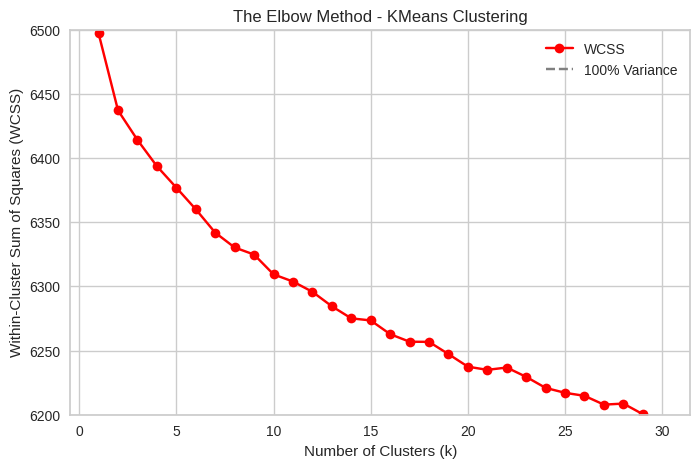

In [77]:
# Create an empty list 'wcss' to store the within-cluster sum of squares (WCSS) for each value of k.
wcss = []

# Loop through different values of k (number of clusters) from 1 to 30.
for i in range(1, 31):
    # Create a KMeans object 'kmeans' with the current value of k.
    # We use the 'k-means++' initialization method to select initial cluster centers for better convergence.
    # The random state is set to 33 for reproducibility of results.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33)

    # Fit the KMeans model to the transformed feature matrix 'x_pca'.
    kmeans.fit(x_pca)

    # Calculate the within-cluster sum of squares (WCSS) for the current value of k.
    # The WCSS is available as the inertia_ attribute of the KMeans object.
    wcss_iter = kmeans.inertia_

    # Append the WCSS value to the 'wcss' list.
    wcss.append(wcss_iter)

# Create a range of numbers from 1 to 30 to represent the different values of k (number of clusters).
number_clusters = range(1, 31)

# Create a figure to plot the Elbow Method results.
plt.figure(figsize=(8, 5))

# Plot the WCSS values against the number of clusters with red color.
plt.plot(number_clusters, wcss, color='red', marker='o', linestyle='-', label='WCSS')

# Plot a horizontal line at y=1 to visualize 100% variance, using grey color and dashed line style.
plt.axhline(y=1, color='grey', linestyle='--', label='100% Variance')

# Set the y-axis range from 6000 to 6500.
plt.ylim(6200, 6500)

# Set the title and labels for the plot.
plt.title('The Elbow Method - KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Show the legend to display the labels.
plt.legend()

# Show the plot.
plt.show()

**Observations:**
As the number of clusters increases in K-means clustering, the sum of squared distances between each data point and its corresponding cluster centroid decreases. This phenomenon occurs because with more clusters, the algorithm can create smaller and more tightly packed clusters, which leads to a better fit of the data points within their respective clusters.

In other words, when there are fewer clusters, each cluster tends to cover a larger region, and the centroid might not be close to all the data points it represents. As a result, the sum of squared distances between data points and their centroid is relatively larger.

However, as the number of clusters increases, each cluster becomes more focused and concentrated around its centroid. This means that the data points within each cluster are much closer to their respective centroid. Consequently, the sum of squared distances between data points and their centroid decreases, indicating that the data points are more tightly grouped together within their clusters.

It's essential to find the optimal number of clusters that strike a balance between having too few clusters (leading to less accurate representation of data patterns) and having too many clusters (leading to overfitting and reduced interpretability). This is where techniques like the elbow method and Silhouette score come into play, helping us determine the ideal number of clusters that best capture the underlying structure of the data.

For n_clusters = 2, silhouette score is 0.005492975199964538


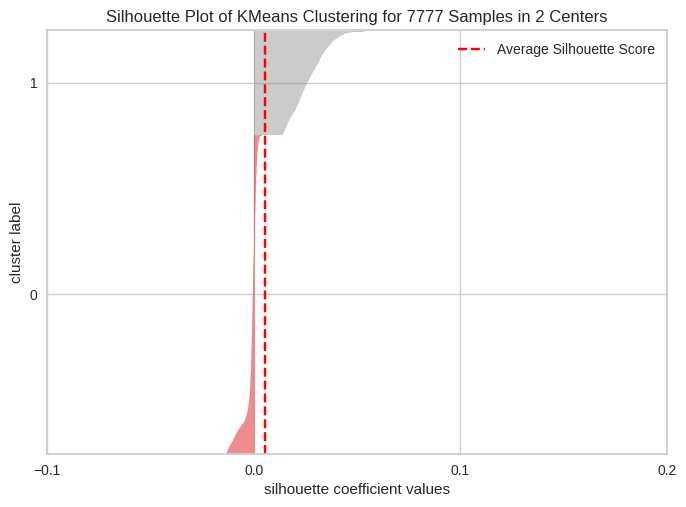

For n_clusters = 3, silhouette score is 0.006504980726838648


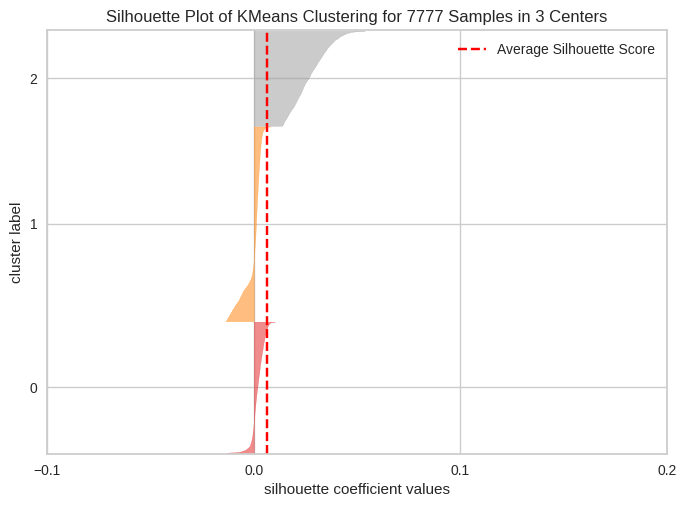

For n_clusters = 4, silhouette score is 0.00801767782918465


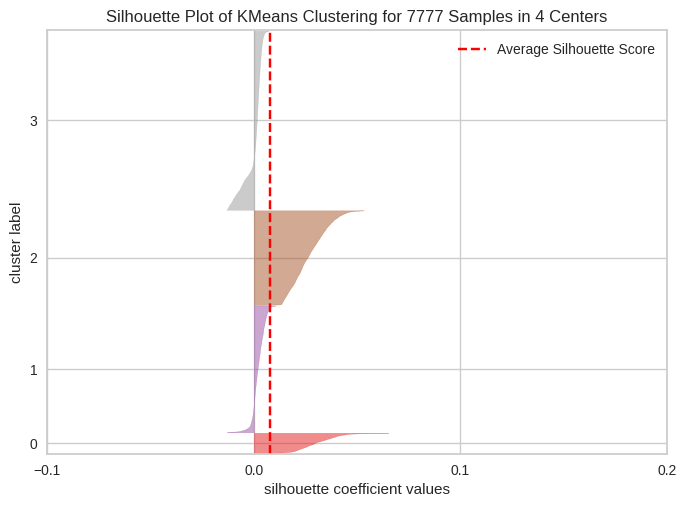

For n_clusters = 5, silhouette score is 0.008732687218828267


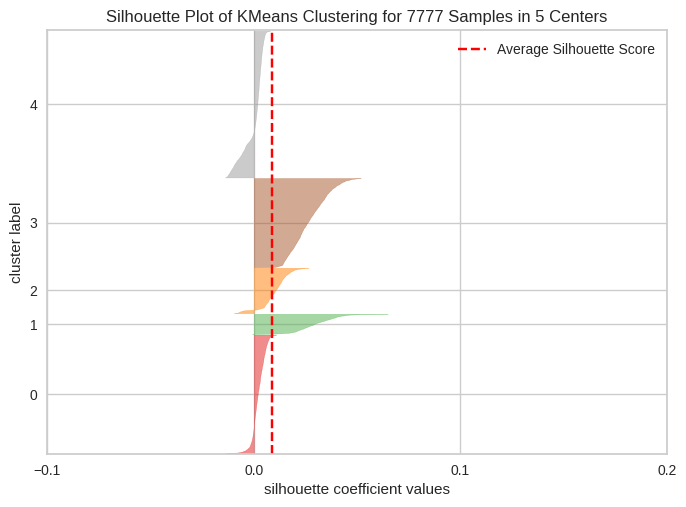

For n_clusters = 6, silhouette score is 0.008640135091479482


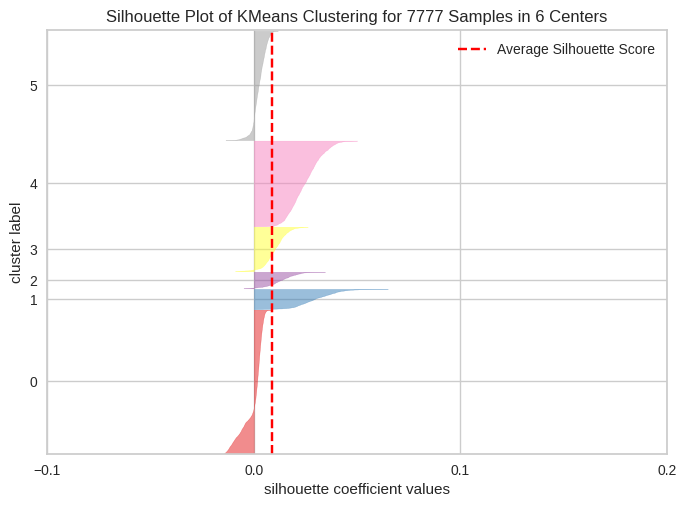

For n_clusters = 7, silhouette score is 0.005872181394350025


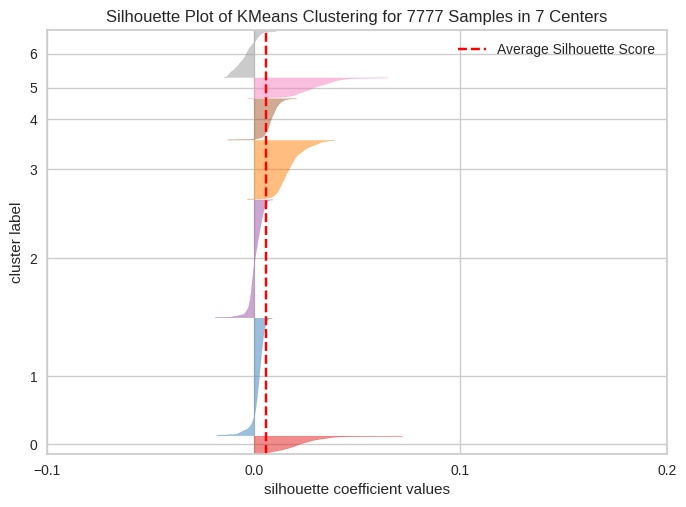

For n_clusters = 8, silhouette score is 0.0020041779819072758


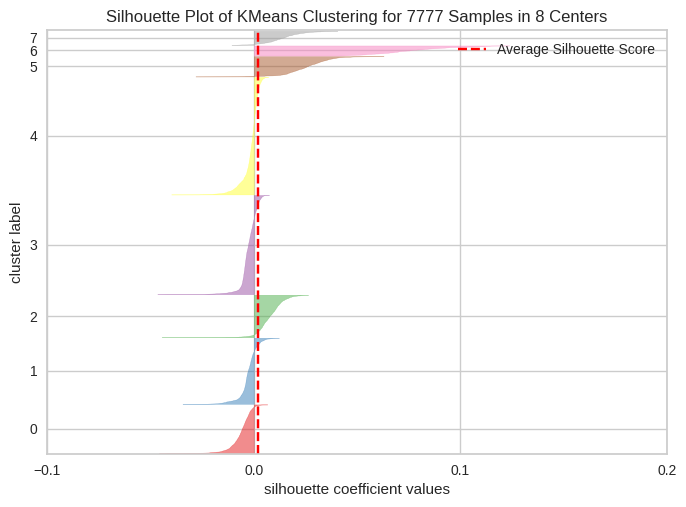

For n_clusters = 9, silhouette score is 0.007151802588023696


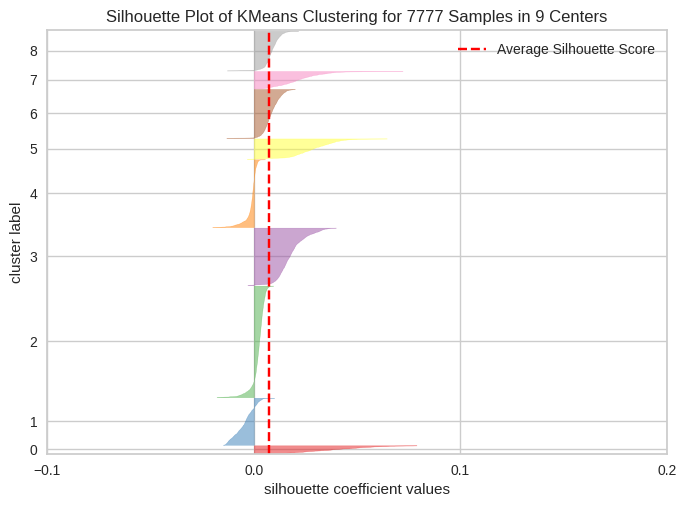

For n_clusters = 10, silhouette score is 0.006987652755677888


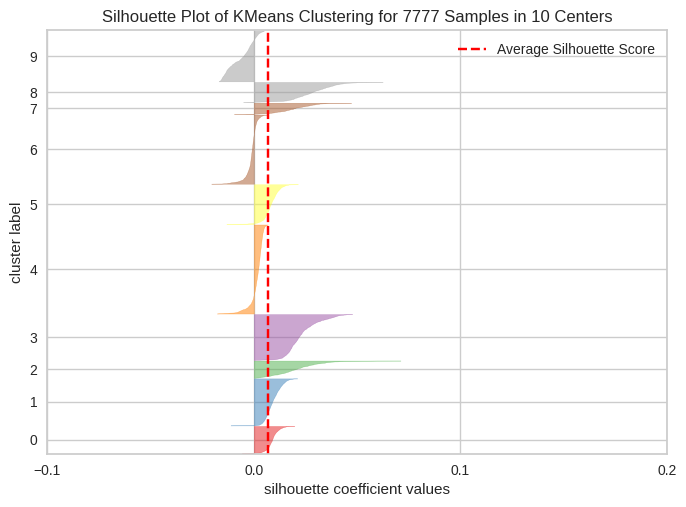

For n_clusters = 11, silhouette score is 0.0035322163171813675


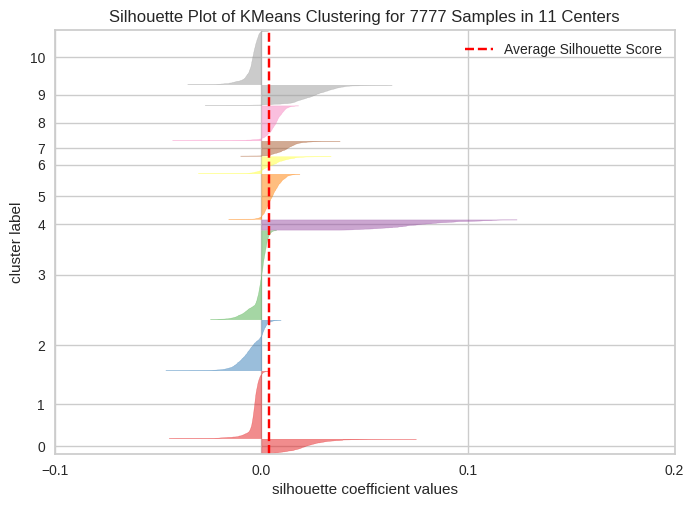

For n_clusters = 12, silhouette score is 0.004510851488021385


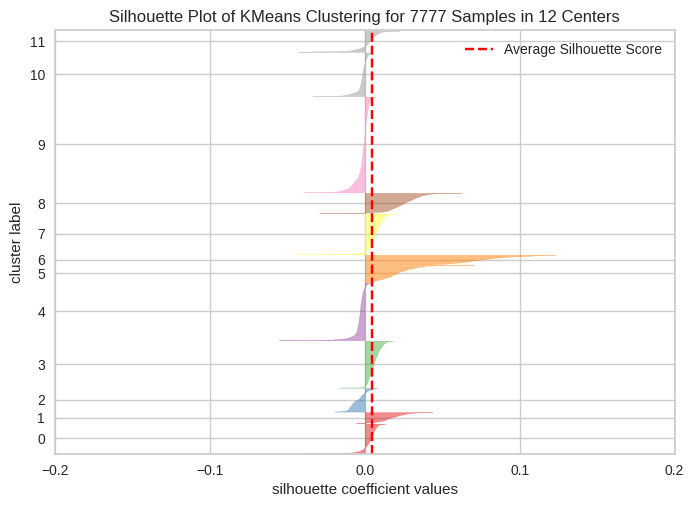

For n_clusters = 13, silhouette score is 0.004488952004496795


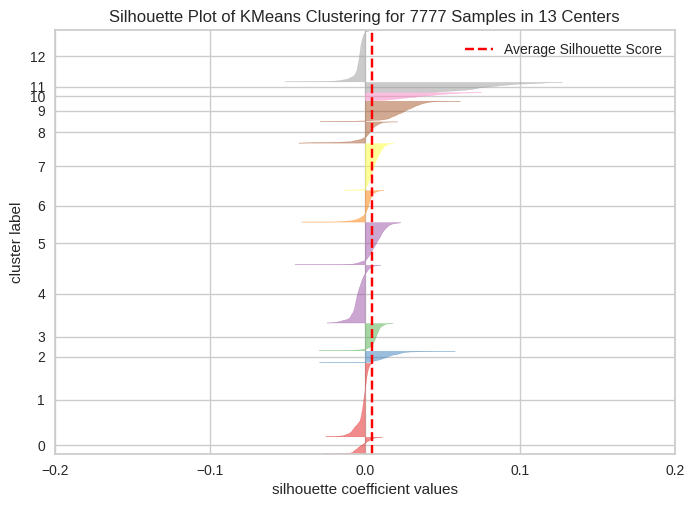

For n_clusters = 14, silhouette score is 0.005456350146603072


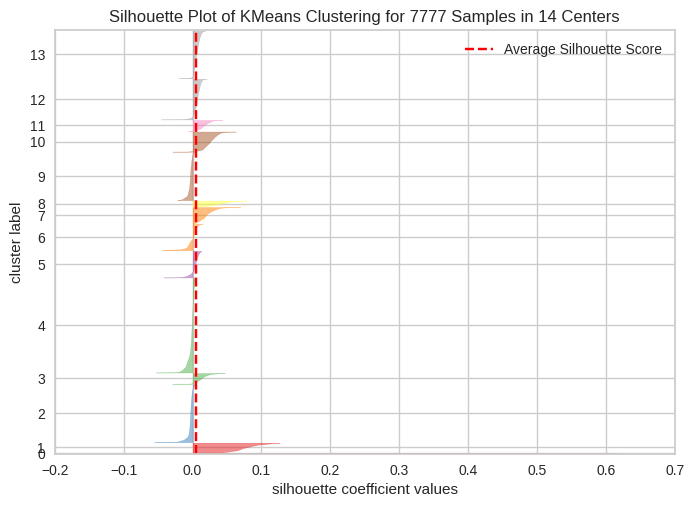

For n_clusters = 15, silhouette score is 0.005964910789406914


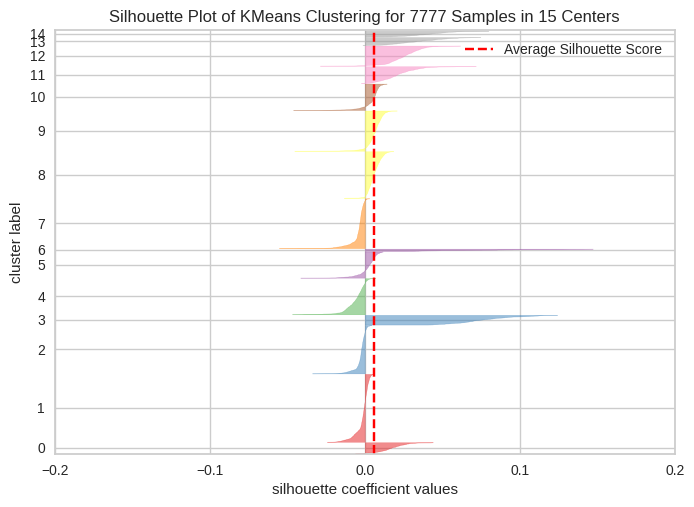

For n_clusters = 16, silhouette score is 0.005432909056174539


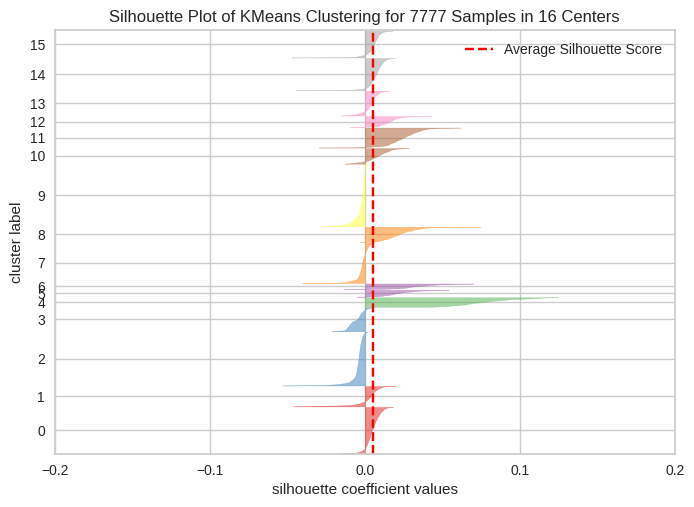

For n_clusters = 17, silhouette score is 0.006348925869253976


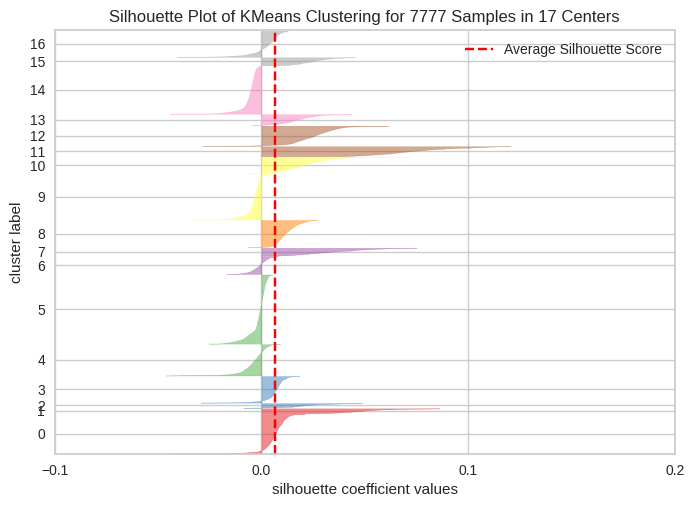

For n_clusters = 18, silhouette score is 0.007106371376884261


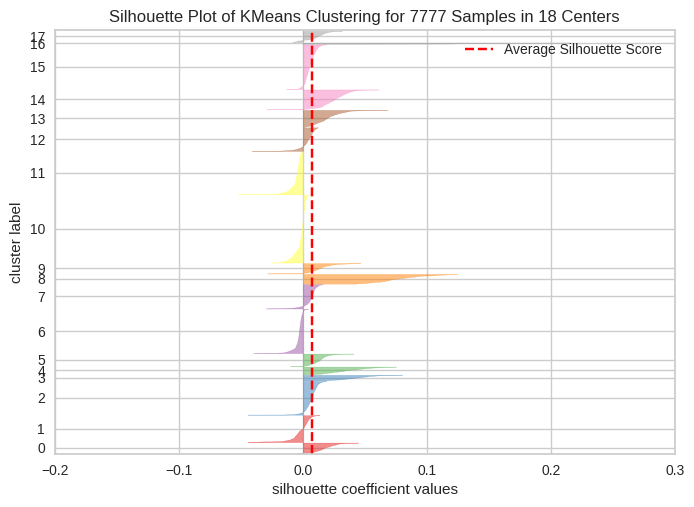

For n_clusters = 19, silhouette score is 0.004928400030560275


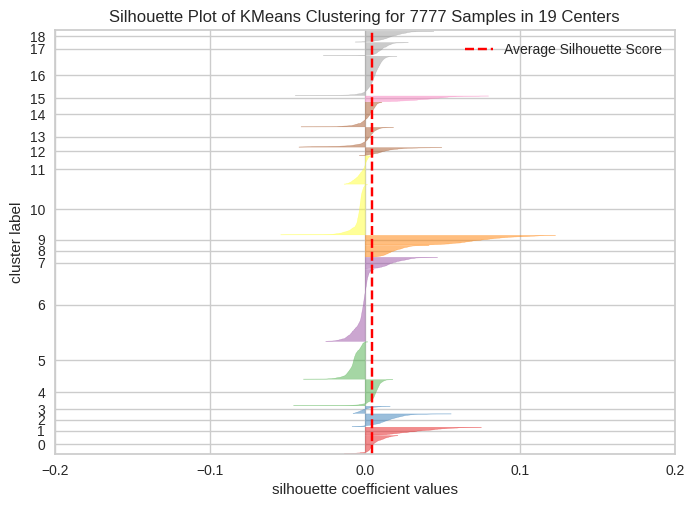

For n_clusters = 20, silhouette score is 0.00577210760828679


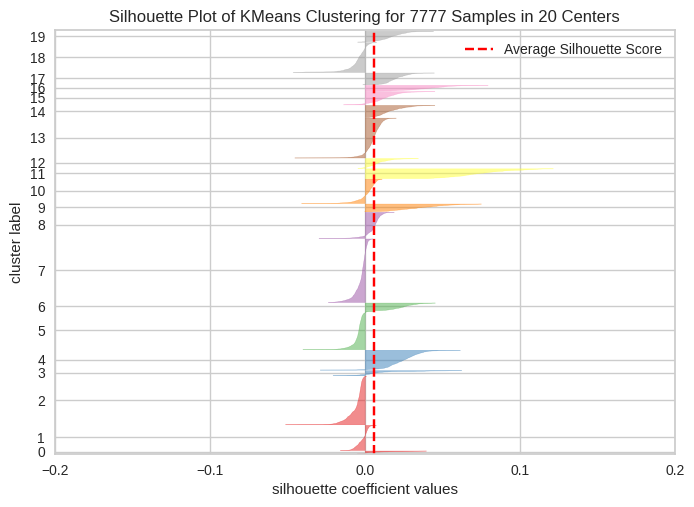

For n_clusters = 21, silhouette score is 0.005612837552764327


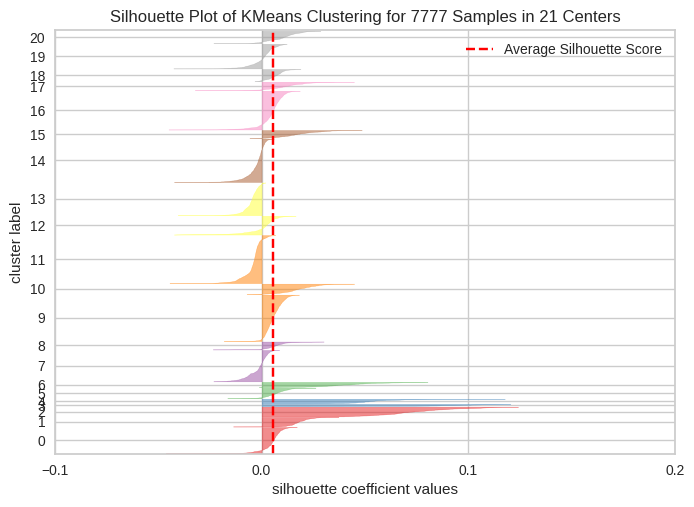

For n_clusters = 22, silhouette score is 0.006060646807679195


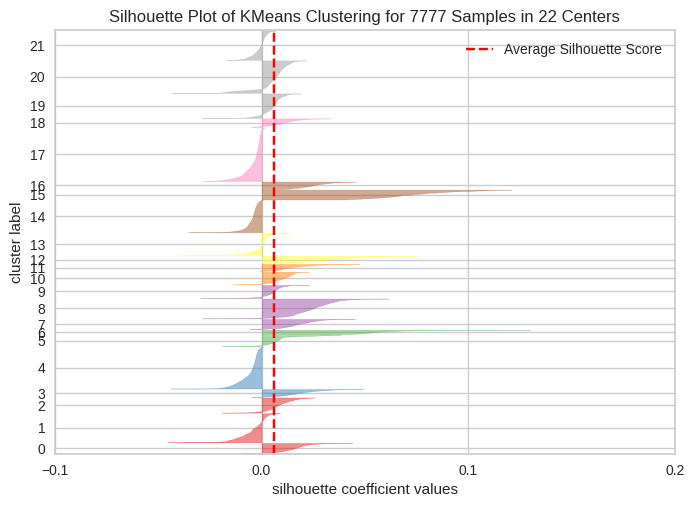

For n_clusters = 23, silhouette score is 0.006525870282345793


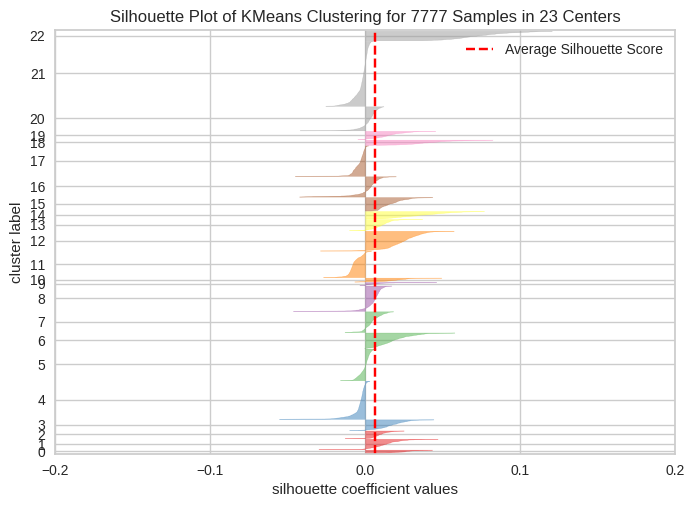

For n_clusters = 24, silhouette score is 0.005811391741549994


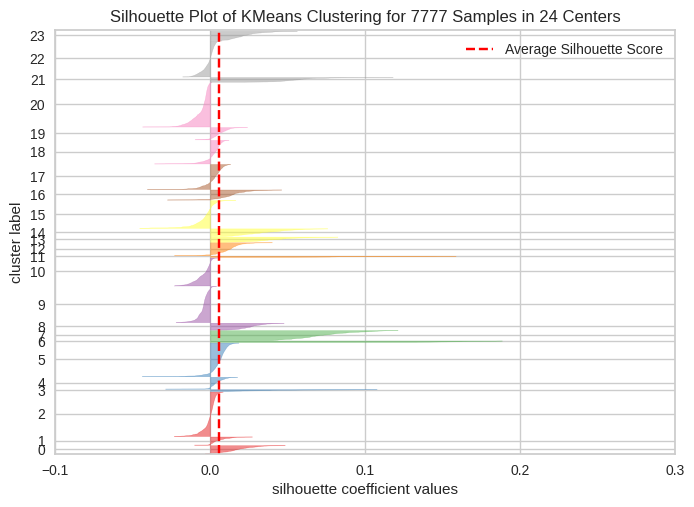

For n_clusters = 25, silhouette score is 0.006731907929214274


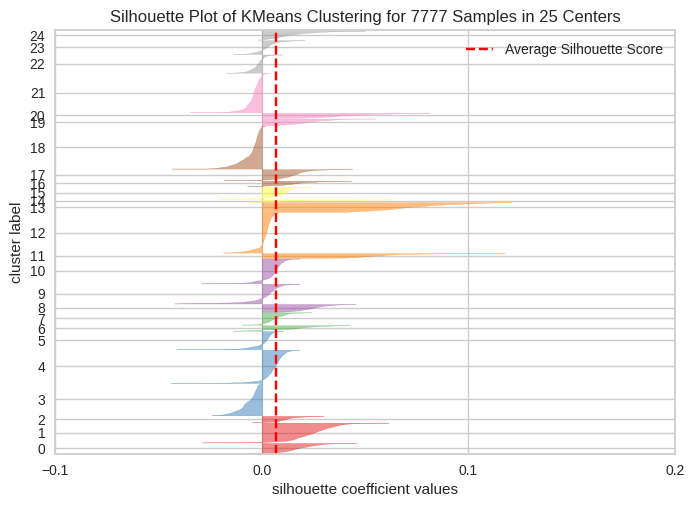

For n_clusters = 26, silhouette score is 0.007939975825864719


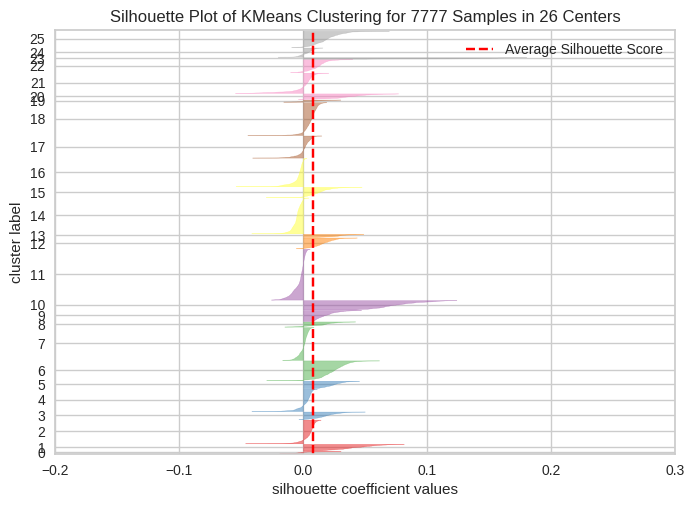

For n_clusters = 27, silhouette score is 0.0066504443854367165


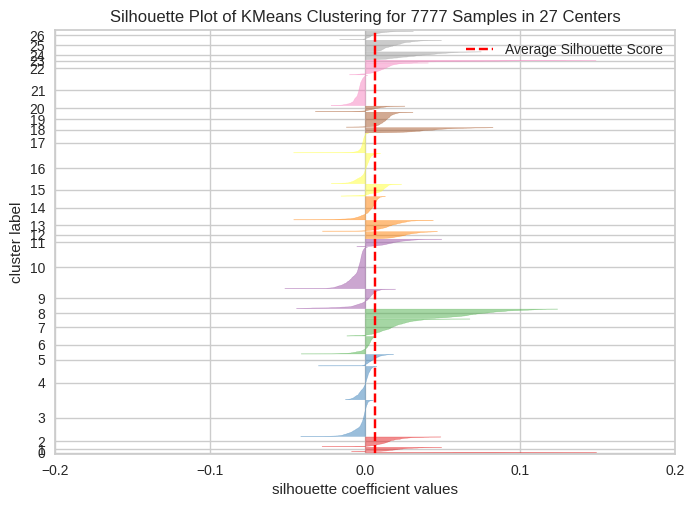

For n_clusters = 28, silhouette score is 0.007961128292610802


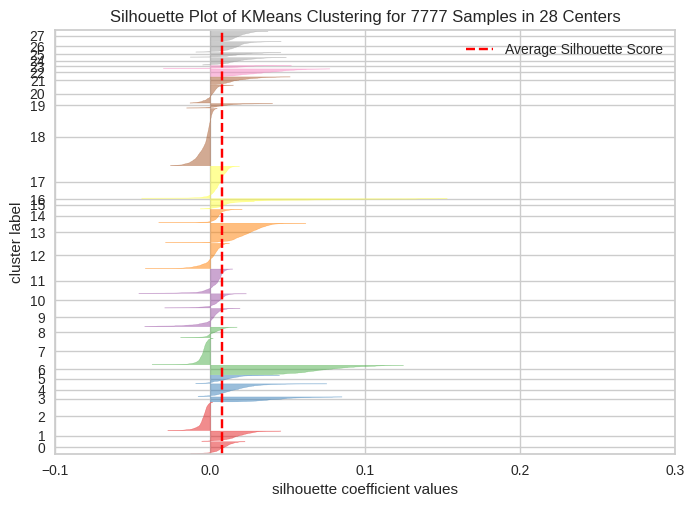

For n_clusters = 29, silhouette score is 0.006335590948291471


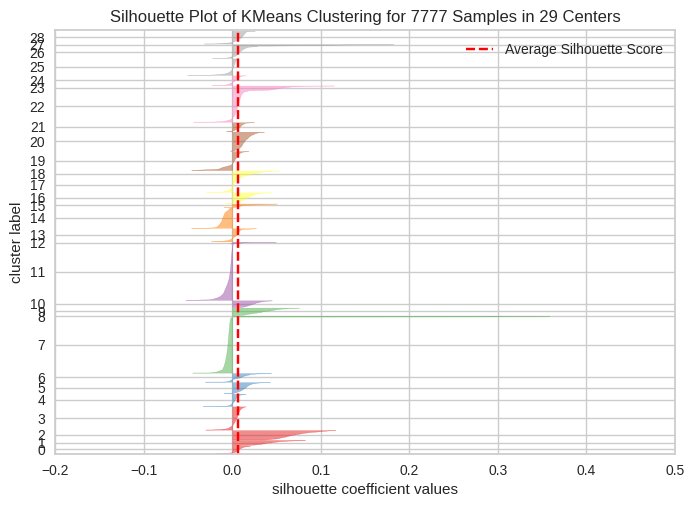

In [80]:
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_score_analysis(n):
    """
    Perform K-means clustering for different values of 'n_clusters' and display the Silhouette plot.

    Parameters:
        n (int): The upper limit of 'n_clusters' (exclusive) for the analysis.

    Returns:
        None
    """
    for n_clusters in range(2, n):
        # Initialize the KMeans model with the current number of clusters.
        km = KMeans(n_clusters=n_clusters, random_state=5)

        # Fit the model to the transformed feature matrix 'x_pca'.
        preds = km.fit_predict(x_pca)

        # Obtain the cluster centroids.
        centers = km.cluster_centers_

        # Calculate the Silhouette score for the current number of clusters.
        score = silhouette_score(x_pca, preds, metric='euclidean')
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

        # Create a SilhouetteVisualizer for the KMeans model.
        visualizer = SilhouetteVisualizer(km)

        # Fit the visualizer to the transformed feature matrix 'x_pca'.
        visualizer.fit(x_pca)

        # Display the Silhouette plot.
        visualizer.poof()

# Call the function with the desired upper limit for 'n_clusters'.
silhouette_score_analysis(30)


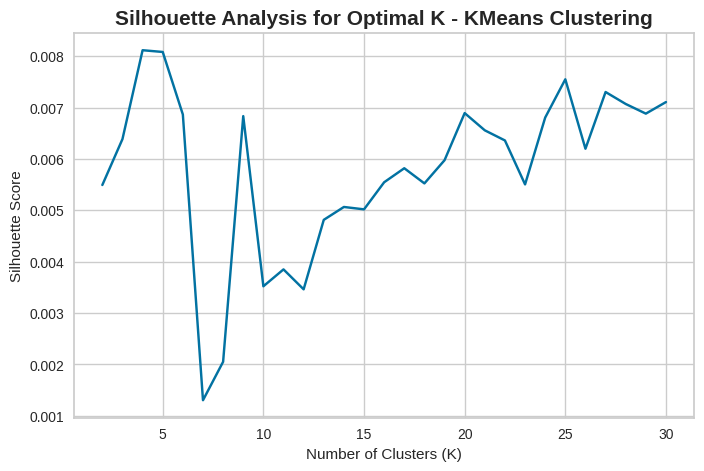

In [81]:
def plot_silhouette_score(x_pca, max_clusters=30):
    """
    Plot the Silhouette score for different numbers of clusters in K-means clustering.

    Parameters:
        x_pca (numpy.array): Transformed feature matrix obtained after PCA.
        max_clusters (int): The upper limit for the number of clusters to consider.

    Returns:
        None
    """
    range_n_clusters = range(2, max_clusters + 1)
    silhouette_avg = []

    # Loop through different values of 'n_clusters'.
    for num_clusters in range_n_clusters:
        # Initialize the KMeans model with the current number of clusters.
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=33)

        # Fit the KMeans model to the transformed feature matrix 'x_pca'.
        cluster_labels = kmeans.fit_predict(x_pca)

        # Calculate the Silhouette score for the current number of clusters.
        silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

    # Plot the Silhouette scores against the number of clusters.
    plt.figure(figsize=(8, 5))
    plt.plot(range_n_clusters, silhouette_avg)
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis for Optimal K - KMeans Clustering', fontsize=15, fontweight='bold')
    plt.show()

# Call the function with the transformed feature matrix 'x_pca' and the maximum number of clusters to consider.
plot_silhouette_score(x_pca, max_clusters=30)

**Observations:**After analyzing the Silhouette scores for different numbers of clusters, it was observed that the clustering configuration with six clusters achieved the highest Silhouette score overall. This indicates that creating six clusters using the k-means clustering algorithm led to the most well-defined and distinct clusters, where the data points within each cluster are closer to their respective centroids compared to other clusterings.

Based on this insight, we can utilize the k-means clustering algorithm with six clusters to group the data into distinct categories. Each cluster will be represented by its centroid, and the data points within each cluster will share similar characteristics or attributes. By creating six clusters, we can effectively partition the data and gain meaningful insights into the underlying structure and patterns within the dataset.

Utilizing the six-cluster solution allows us to capture the main variations and relationships present in the data, enabling more focused and interpretable analysis. This approach provides a balance between having too few clusters, which may oversimplify the data, and having too many clusters, which might introduce noise and reduce the interpretability of the results. Therefore, the six-cluster solution offers a robust and informative representation of the data, aiding in various applications such as customer segmentation, anomaly detection, or pattern recognition.

In [82]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=50)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=50)

In [83]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)
print((kmeans_distortion,kmeans_silhouette_score))

(6361.2936014489405, 0.009161668425146383)


In [84]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

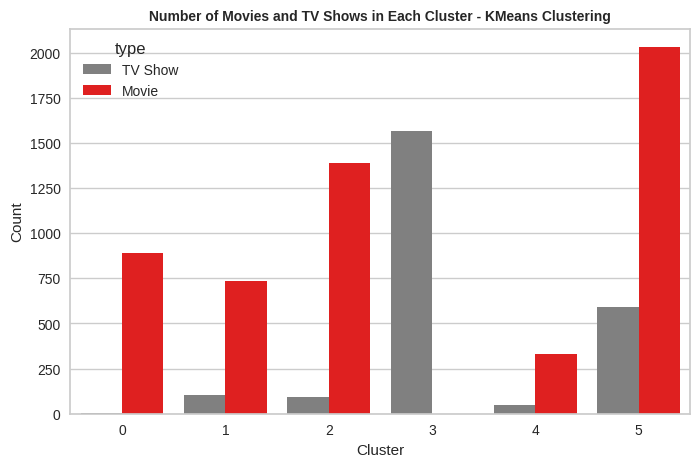

In [85]:
# Create a count plot to show the number of movies and TV shows in each cluster using Seaborn.
plt.figure(figsize=(8, 5))
q = sns.countplot(x='kmeans_cluster', data=df, hue='type', palette={'Movie': 'red', 'TV Show': 'grey'})

# Set the title and labels for the plot.
plt.title('Number of Movies and TV Shows in Each Cluster - KMeans Clustering', fontsize=10, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Show the plot.
plt.show()

**Observations:**The K-means clustering technique was effectively applied to create six distinct clusters from the given dataset. By leveraging the K-means algorithm, the data points were partitioned into groups such that the points within each cluster are more similar to each other than to those in other clusters. These six clusters represent well-defined categories that capture different patterns and characteristics present in the data.

The successful construction of these six clusters enables us to gain valuable insights into the underlying structure of the dataset. Each cluster is represented by its centroid, serving as the center of the cluster and summarizing its key characteristics. By analyzing the data points within each cluster, we can identify meaningful patterns, trends, or relationships that may have been obscured in the original dataset.

The six-cluster solution provides a useful framework for various applications, such as customer segmentation, content recommendation, or market analysis. Additionally, it simplifies the understanding and interpretation of the data, as it allows us to focus on distinct groups with specific attributes and behavior. Overall, the K-means clustering technique proved to be a valuable tool in organizing and extracting meaningful information from the data, leading to more effective data analysis and decision-making processes.

###**8.2. Building wordclouds for different clusters built:**

**Word clouds are visual representations of word frequency in a given text, where words that occur more frequently are displayed with larger size and greater prominence, making them stand out more prominently compared to less frequent words.**

In [86]:
from wordcloud import WordCloud, STOPWORDS

def kmeans_wordcloud(cluster_num):
    """
    Generate a word cloud for the movie descriptions in a specific cluster.

    Parameters:
        cluster_num (int): The cluster number for which the word cloud will be generated.

    Returns:
        None
    """
    comment_words = ''
    stopwords = set(STOPWORDS)

    # Iterate through the DataFrame to extract descriptions of the specific cluster.
    for val in df[df['kmeans_cluster'] == cluster_num].description.values:
        val = str(val)
        tokens = val.split()

        # Convert all tokens to lowercase for uniformity.
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    # Create a WordCloud object with specific parameters.
    wordcloud = WordCloud(width=700, height=700, background_color='azure', stopwords=stopwords, min_font_size=8,
                          colormap='Reds_r').generate(comment_words)

    # Plot the WordCloud image.
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

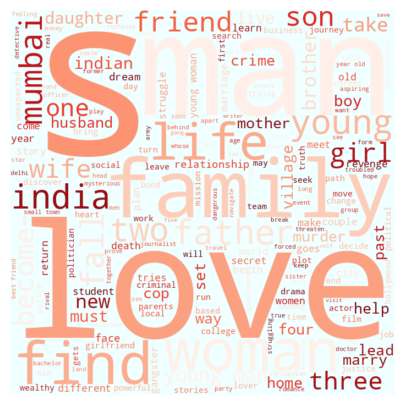

In [89]:
# Wordcloud for cluster 0
kmeans_wordcloud(0)

In cluster 0, several keywords were identified to be frequently associated with the movie descriptions. These keywords include "love," "man," "family," "find," and "S." The prominence of these keywords suggests that movies in this cluster often revolve around themes related to life experiences, documentaries, family dynamics, global perspectives, and the art of filmmaking.

The identification of these keywords provides valuable insights into the common characteristics and topics prevalent in movies within cluster 0. This information can be useful for content analysis, content recommendation, and understanding audience preferences. By recognizing the recurring themes in this cluster, content creators and movie enthusiasts can gain a better understanding of the type of content that resonates with viewers in this specific group. Furthermore, it highlights the potential for targeted marketing and audience engagement, as content related to these keywords may appeal strongly to individuals with similar interests and preferences.

The word cloud visualization effectively captures the essence of cluster 0, showcasing the prominence of these keywords through their larger font size and greater visual prominence. Overall, the analysis of keywords in cluster 0 enriches our understanding of the underlying content and themes that define this particular group of movies.

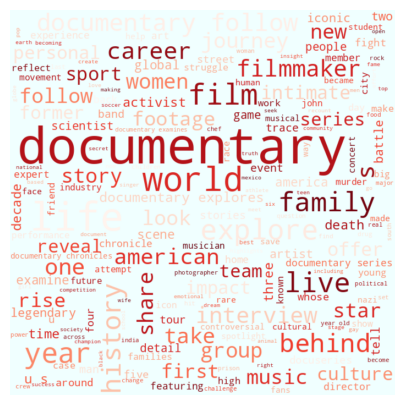

In [90]:
# Wordcloud for cluster 1
kmeans_wordcloud(1)

*   **Life, love, find, young, man were noticed as keywords in cluster  1**

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

*   **Series, world, adventure, life, new were noticed as keywords in cluster 2**

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

*   **Comedian, special, stand, comic, comedy were noticed as keywords in cluster 3**

In [ ]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

*   **Life, find, new, family, friend were noticed as keywords in cluster 4**

In [ ]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

*   **Life, love, find, young, new were noticed as keywords in cluster 5**

###**8.3. Hierarchical clustering**

**In k Means we have to define the no of cluster that is k=3 but in
hierarchical clustering takes away the problem of having to pre-define the number of clusters. Uses the agglomerative (hierarchical) clustering process for building clusters.**
**Using the dendrogram to visualize the agglomerative (hierarchical) clustering process to determine the ideal number of clusters.**

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(8,5))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('DENDOGRAM',fontsize=10, fontweight='bold')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5, color='r', linestyle='--')

**Agglomerative hierarchical clustering:Uses Bottom Up Approach.Suppose there are 4 data points. We will assign clusters to each data points and  hence will have 4 clusters in the beginning.Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left.**


In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type',color='#8B7355')
plt.title('NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - HIERARCHICAL CLUSTERING',fontsize=10, fontweight='bold')

**Observations:**
*   **Utilising the Agglomerative (hierarchical) clustering algorithm, 12 clusters were successfully built**

###**8.4. Building wordclouds for different clusters built:**

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:
      val = str(val)
      tokens = val.split()
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,background_color ='azure',stopwords = stopwords,min_font_size = 8).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8,5))
  plt.imshow(wordcloud)
  plt.axis("off")


In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

**Love, women, life, hong, kong were the keywords found in cluster 0**

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

**Find, life, new, family, take were the keywords found in cluster 1**

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

**world, life, friend, new, family were the keywords found in cluster 2**

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

**life, man, love, find, women were the keywords found in cluster 3**

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

**documentary, world, interview, history, film were the keywords found in cluster 4**

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

**Love, man, family, women, life were the keywords found in cluster 5**

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

**man, women, love, family, two were the keywords found in cluster 5**

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

**Love, lite, new, friend, help were the keywords found in cluster 5**

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

**documentary, life, interview, world, follows were the keywords found in cluster 5**

In [ ]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

**life, women, man, egyptian, young were the keywords found in cluster 5**

In [ ]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

**Hong, kong, life, material, arts were the keywords found in cluster 5**

In [ ]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

**world, young, life, year, battle were the keywords found in cluster 5**

#**9. Building Content based recommender system:**

**The objective of a Recommender System is to recommend relevant items for users, based on their preference. If a person has watched a show on netflix, then the recommender system must be able to recommend a list of similar shows.**

In [ ]:
# Changing the index of the df from show id to show title
df['show_id'] = df.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

df['clustering'] = df['clustering'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
df.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(df['clustering'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(df.index)

def recommend_top10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)

    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(df.index)[i])
    print("If you like this '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'


In [ ]:
# Recommendations for 'A Man Called God'
recommend_top10('A Man Called God')

In [ ]:
# Recommendations for 'Stranger Things'
recommend_top10('Breaking Bad')

In [ ]:
# Recommendations for 'Peaky Blinders'
recommend_top10('Peaky Blinders')

In [ ]:
# Recommendations for 'Lucifer'
recommend_top10('Lucifer')

In [ ]:
# Recommendations for 'abc'
recommend_top10('fun')

#**10. Summary and Conclusion:**

**In this project, we tackled a text clustering issue where we had to categorize Netflix shows into specific clusters such that the shows within a cluster are similar to one another and the shows in different clusters are dissimilar to one another.**


*   **Once our dataset is loaded, and then we search for duplicates and missing values. No duplicate values were discovered, and any missing values were used to fill them in. In our dataset, the director column contains the most missing entries, followed by cast, country, and date_added. The string "unknown" is used to fill missing values in the director and country columns, "no cast" is used fill in the cast column, and the mode value is used to fill missing values in the rating column.  the records that had null entries in the "date_added" column were deleted.**

*   **31% of Netflix's content is television shows, while 69% of it is movie show, demonstrating that movie shows have greater content. TV-MA, which stands for "Mature Audience," is the most frequently used classification for movie and tv shows, followed by TV-14, which stands for "Younger Audience." Since the number of movie shows is higher than the number of TV shows, movie shows receive the highest rating when compared to TV shows, from this we can say people like to watch movie show than compare to tv shows.**

*   **Over the years, Netflix has added more shows to its platform. Most movies were released in 2017 and 2018. Most television shows were broadcast in 2019 and 2020. The covid-19-induced lockdowns that stopped the production of shows may be to blame for the decline in the number of movies added in the year 2020. There are fewer movies uploaded this year because the Netflix data we have only extends through 2021.**

*   **Netflix's movie show library is expanding much more quickly than its TV show library. It looks that Netflix has prioritised adding more movie material over TV shows. The growth of movies has been significantly more pronounced than that of TV shows.More content is released over the Christmas season (October, November, December, and January). There are more movies released each month compared to TV shows.Documentaries are the most popular Netflix category, followed by stand-up comedy, dramas, and foreign films. Kids TV is the most well-liked Netflix TV shows.**


*   **The majority of movies durations last between 90 and 120 minutes. Most tv shows have just one season. The lengthiest average runtimes are found in NC-17 rated movies. The average duration of movies with a TV-Y rating is the shortest. The geograph visualisations show that the United States and India are the two countries that produce the most content.**

*   **The director, cast, country, genre, and description are chosen as the attributes to cluster the data based on. These attributes' values underwent tokenization, preprocessing, and vectorization using TFIDF vectorizer. A total of 20000 characteristics were produced through TFIDF vectorization. For the purpose of overcoming the dimensionality curse, we applied Principal Component Analysis (PCA). 4000 components were able to capture more than 80% of variance.**
*   **The ideal number of clusters was found to be six when we first created clusters using the k-means clustering technique. The elbow method and Silhouette score analysis were used to get this result.The Agglomerative clustering technique was then used to create clusters, with 12 being the optimum number. The dendrogram was visualised to achieve this.The similarity matrix acquired after utilising cosine similarity was used to construct a content-based recommender system. Based on the sort of show the user viewed, this recommender system will provide them with 10 recommendations.**